# 2. Pandas data structures for time series data

The Timestamp object and its DatetimeIndex object

In [294]:
import pandas as pd
import numpy as np

print(pd.to_datetime("13th of February, 2009"))
print(pd.to_datetime("02-13-2009"))
print(pd.to_datetime("02-13-2009"))
print(pd.to_datetime("Feb 13, 2009 14:20:00"))
print(pd.to_datetime("13:00"))
print(pd.to_datetime("now"))

2009-02-13 00:00:00
2009-02-13 00:00:00
2009-02-13 00:00:00
2009-02-13 14:20:00
2023-12-06 13:00:00
2023-12-06 15:10:35.636304


In [295]:
pd.to_datetime("Feb 13, 2009 14:20:00").day_name()

'Friday'

In [296]:
dates = pd.to_datetime(
    [pd.Timestamp(2015, 8, 5), pd.Timestamp(2015, 8, 6), pd.Timestamp(2015, 8, 7)]
)
dates

DatetimeIndex(['2015-08-05', '2015-08-06', '2015-08-07'], dtype='datetime64[ns]', freq=None)

In [297]:
dates.day

Index([5, 6, 7], dtype='int32')

In [298]:
dates.month

Index([8, 8, 8], dtype='int32')

The Timedelta object and its TimedeltaIndex object

In [299]:
date1 = pd.Timestamp("2018-03-03")
date2 = pd.Timestamp("1984-03-03")
date1 - date2

Timedelta('12418 days 00:00:00')

In [300]:
pd.Timedelta(days=54, hours=3)

Timedelta('54 days 03:00:00')

In [301]:
date1 + pd.Timedelta(days=54, hours=3)

Timestamp('2018-04-26 03:00:00')

In [302]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '2 days'], dtype='timedelta64[ns]', freq=None)

The Period object and its PeriodIndex object

In [303]:
# Default period of object frequency is month
jan2015 = pd.Period("2015-01")
jan2015

Period('2015-01', 'M')

In [304]:
pd.Period("2015-01", freq="D")

Period('2015-01-01', 'D')

In [305]:
jan2015.start_time

Timestamp('2015-01-01 00:00:00')

In [306]:
jan2015.end_time

Timestamp('2015-01-31 23:59:59.999999999')

In [307]:
# change period frequency

period = pd.Period("2015-01", freq="H")
period.asfreq("D")

Period('2015-01-01', 'D')

In [308]:
# convert `Period` object into a `Timestamp`
period = pd.Period("2015-01", freq="H")
period.to_timestamp()

Timestamp('2015-01-01 00:00:00')

In [309]:
# convert `TimeStamp` object to a `Period` one
pd.Timestamp("2015-01-01 00:00:00").to_period("M")

Period('2015-01', 'M')

In [310]:
dates.to_period("D")

PeriodIndex(['2015-08-05', '2015-08-06', '2015-08-07'], dtype='period[D]')

In [311]:
dates.to_period("D")[0].start_time

Timestamp('2015-08-05 00:00:00')

In [312]:
dates.to_period("D")[0].end_time

Timestamp('2015-08-05 23:59:59.999999999')

Creating series and dataframes using the three data structures

In [313]:
ts1 = pd.Series(np.arange(3), dates)
print(ts1)
print(ts1.index)

2015-08-05    0
2015-08-06    1
2015-08-07    2
dtype: int64
DatetimeIndex(['2015-08-05', '2015-08-06', '2015-08-07'], dtype='datetime64[ns]', freq=None)


In [314]:
ts2 = pd.Series(np.arange(3), dates.to_period("D"))
print(ts2)
print(ts2.index)

2015-08-05    0
2015-08-06    1
2015-08-07    2
Freq: D, dtype: int64
PeriodIndex(['2015-08-05', '2015-08-06', '2015-08-07'], dtype='period[D]')


In [315]:
ts3 = pd.Series(np.arange(3), dates - dates[0])
print(ts3)
print(ts3.index)

0 days    0
1 days    1
2 days    2
dtype: int64
TimedeltaIndex(['0 days', '1 days', '2 days'], dtype='timedelta64[ns]', freq=None)


In [316]:
print(ts1["2015.08.05"])
print(ts1["august 5, 2015"])

0
0


In [317]:
ts1[1:3]

2015-08-06    1
2015-08-07    2
dtype: int64

In [318]:
ts1["2015-08-06 ":"2015-08-07 "]

2015-08-06    1
2015-08-07    2
dtype: int64

In [319]:
ts1["2015"]

2015-08-05    0
2015-08-06    1
2015-08-07    2
dtype: int64

Creating time ranges

In [320]:
# timestamps ranges
pd.date_range("2018-01-01", "2018-01-05")

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05'],
              dtype='datetime64[ns]', freq='D')

In [321]:
pd.date_range("2018-01-01", periods=5)

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05'],
              dtype='datetime64[ns]', freq='D')

In [322]:
pd.date_range("01-01-2018", periods=5, freq="H")

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 01:00:00',
               '2018-01-01 02:00:00', '2018-01-01 03:00:00',
               '2018-01-01 04:00:00'],
              dtype='datetime64[ns]', freq='H')

In [323]:
# timedeltas ranges
pd.timedelta_range(0, periods=5, freq="H")

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00'],
               dtype='timedelta64[ns]', freq='H')

In [324]:
# period ranges
pd.period_range("2018-01", periods=3, freq="M")

PeriodIndex(['2018-01', '2018-02', '2018-03'], dtype='period[M]')

Frequencies and offsets

In [325]:
pd.DateOffset(days=1)

<DateOffset: days=1>

In [326]:
pd.Timestamp("2010.01.01") + pd.DateOffset(days=1)

Timestamp('2010-01-02 00:00:00')

In [327]:
from pandas.tseries.offsets import *

In [328]:
pd.date_range("2010-07-07", periods=5, freq=BDay())

DatetimeIndex(['2010-07-07', '2010-07-08', '2010-07-09', '2010-07-12',
               '2010-07-13'],
              dtype='datetime64[ns]', freq='B')

In [329]:
pd.date_range("2010-07-07", periods=10, freq="W-FRI")

DatetimeIndex(['2010-07-09', '2010-07-16', '2010-07-23', '2010-07-30',
               '2010-08-06', '2010-08-13', '2010-08-20', '2010-08-27',
               '2010-09-03', '2010-09-10'],
              dtype='datetime64[ns]', freq='W-FRI')

# 3. Shifting and computing first differences

Getting the data

In [330]:
import pandas as pd

# load the data
data = pd.read_csv("c2_financial_data.csv", index_col="Date")

# create the time index
data.index = pd.to_datetime(data.index, format="%d.%m.%y")  # Convert the index

A first look at the data

In [331]:
# check the number of rows and columns
print(data.shape)

(9137, 6)


In [332]:
# check the few first rows
data.head()

Open  High   Low  Close  Adj Close     Volume
Date                                                     
1984-06-01  8.04  8.13  7.83   8.00       1.84   741000.0
1984-06-04  8.33  8.67  8.17   8.46       1.95   584700.0
1984-06-05  8.46  8.54  8.25   8.38       1.93  5370300.0
1984-06-06  8.38  8.54  8.38   8.54       1.97   365700.0
1984-06-07  8.54  8.58  8.46   8.54       1.97   904800.0

In [333]:
prices = data["Close"]

In [334]:
prices.index[:4]

DatetimeIndex(['1984-06-01', '1984-06-04', '1984-06-05', '1984-06-06'], dtype='datetime64[ns]', name='Date', freq=None)

In [335]:
prices["2012-01-01":"2012-01-10"]

Date
2012-01-03    34.98
2012-01-04    34.95
2012-01-05    35.68
2012-01-06    35.36
2012-01-09    35.30
2012-01-10    36.05
Name: Close, dtype: float64

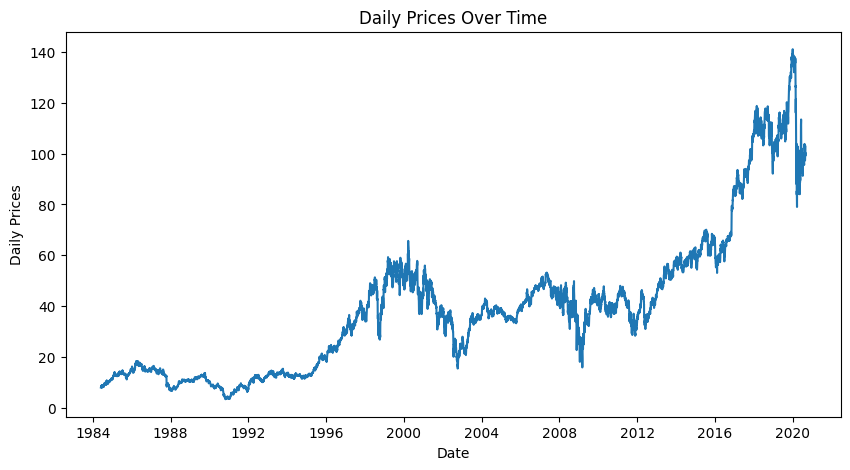

In [336]:
%matplotlib inline
import matplotlib.pyplot as plt

# Set the size of the plot
fig = plt.subplots(figsize=(10, 5))

# Plot the trend of prices
plt.plot(prices)
plt.title("Daily Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Daily Prices")
plt.show()

Shifting entries  
A shift forward in time is called a lag, and a shift backward in time is called a lead.

In [337]:
Pt = prices["2019-12-15":"2019-12-30"]
Pt

Date
2019-12-16    137.34
2019-12-17    138.18
2019-12-18    138.04
2019-12-19    137.35
2019-12-20    137.24
2019-12-23    137.20
2019-12-24    137.58
2019-12-26    139.04
2019-12-27    139.14
2019-12-30    138.63
Name: Close, dtype: float64

In [338]:
Pt.shift(periods=1)

Date
2019-12-16       NaN
2019-12-17    137.34
2019-12-18    138.18
2019-12-19    138.04
2019-12-20    137.35
2019-12-23    137.24
2019-12-24    137.20
2019-12-26    137.58
2019-12-27    139.04
2019-12-30    139.14
Name: Close, dtype: float64

In [339]:
Pt.shift(-1)

Date
2019-12-16    138.18
2019-12-17    138.04
2019-12-18    137.35
2019-12-19    137.24
2019-12-20    137.20
2019-12-23    137.58
2019-12-24    139.04
2019-12-26    139.14
2019-12-27    138.63
2019-12-30       NaN
Name: Close, dtype: float64

In [340]:
p = pd.concat([Pt.shift(-1), Pt, Pt.shift(1), Pt.shift(2)], axis=1)
p.columns = ["Pt+1", "Pt", "Pt-1", "Pt-2"]
print(p)

              Pt+1      Pt    Pt-1    Pt-2
Date                                      
2019-12-16  138.18  137.34     NaN     NaN
2019-12-17  138.04  138.18  137.34     NaN
2019-12-18  137.35  138.04  138.18  137.34
2019-12-19  137.24  137.35  138.04  138.18
2019-12-20  137.20  137.24  137.35  138.04
2019-12-23  137.58  137.20  137.24  137.35
2019-12-24  139.04  137.58  137.20  137.24
2019-12-26  139.14  139.04  137.58  137.20
2019-12-27  138.63  139.14  139.04  137.58
2019-12-30     NaN  138.63  139.14  139.04


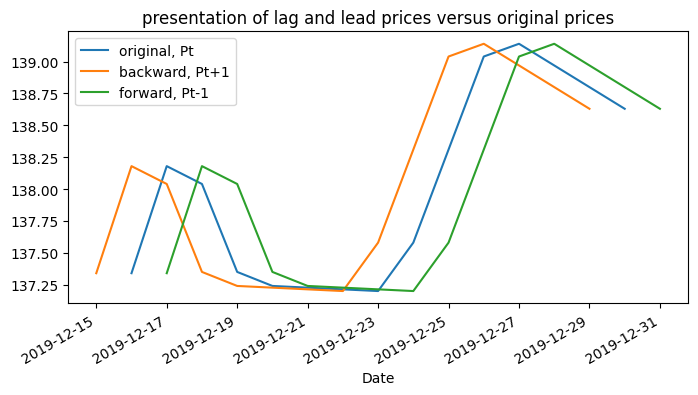

In [341]:
Pt.plot(figsize=(8, 3), label="original, Pt")
Pt.shift(-1, freq="D").plot(figsize=(8, 4), label="backward, Pt+1")
Pt.shift(1, freq="D").plot(figsize=(8, 4), label="forward, Pt-1")
plt.title("presentation of lag and lead prices versus original prices")
plt.legend()

Example - Analyzing the first difference

In [342]:
# Compute first difference
diff = prices - prices.shift(1)

# the subplot on the left
plt.subplot(121)
diff.plot(figsize=(15, 4))
plt.title("Daily changes plotted over time")
plt.ylabel("Day-to-day change ($)")

# the subplot on the right
plt.subplot(122)
diff.hist(figsize=(15, 4), bins=100, grid=False)
plt.title("Distribution of Daily Changes")
plt.xlabel("Day-to-day change ($)")

plt.show()

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:16                                                                                   │
│                                                                                                  │
│   13 plt.title("Distribution of Daily Changes")                                                  │
│   14 plt.xlabel("Day-to-day change ($)")                                                         │
│   15                                                                                             │
│ ❱ 16 plt.show()                                                                                  │
│   17                                                                                             │
│                                                                                                  │
│ /home/miguel/.pyenv/versions/3.9/envs/epfl_extension_school/lib/python3.9/site-packages/matplotl │
│ ib/pyplot.py:446 in show                                                                         │
│                                                                                                  │
│    443 │   explicitly there.                                                                     │
│    444 │   """                                                                                   │
│    445 │   _warn_if_gui_out_of_main_thread()                                                     │
│ ❱  446 │   return _get_backend_mod().show(*args, **kwargs)                                       │
│    447                                                                                           │
│    448                                                                                           │
│    449 def isinteractive():                                                                      │
│                                                                                                  │
│ /home/miguel/.pyenv/versions/3.9/envs/epfl_extension_school/lib/python3.9/site-packages/matplotl │
│ ib_inline/backend_inline.py:90 in show                                                           │
│                                                                                                  │
│    87 │   │   close = InlineBackend.instance().close_figures                                     │
│    88 │   try:                                                                                   │
│    89 │   │   for figure_manager in Gcf.get_all_fig_managers():                                  │
│ ❱  90 │   │   │   display(                                                                       │
│    91 │   │   │   │   figure_manager.canvas.figure,                                              │
│    92 │   │   │   │   metadata=_fetch_figure_metadata(figure_manager.canvas.figure)              │
│    93 │   │   │   )                                                                              │
│                                                                                                  │
│ /home/miguel/.pyenv/versions/3.9/envs/epfl_extension_school/lib/python3.9/site-packages/IPython/ │
│ core/display.py:320 in display                                                                   │
│                                                                                                  │
│    317 │   │   if raw:                                                                           │
│    318 │   │   │   publish_display_data(data=obj, metadata=metadata, **kwargs)                   │
│    319 │   │   else:                                                                             │
│ ❱  320 │   │   │   format_dict, md_dict = format(obj, include=include, exclude=exclude)          │
│    321 │   │   │   if not format_dict:                                                           │
│    322 │   │   │   │   # nothing to display (e.g. _ipython_

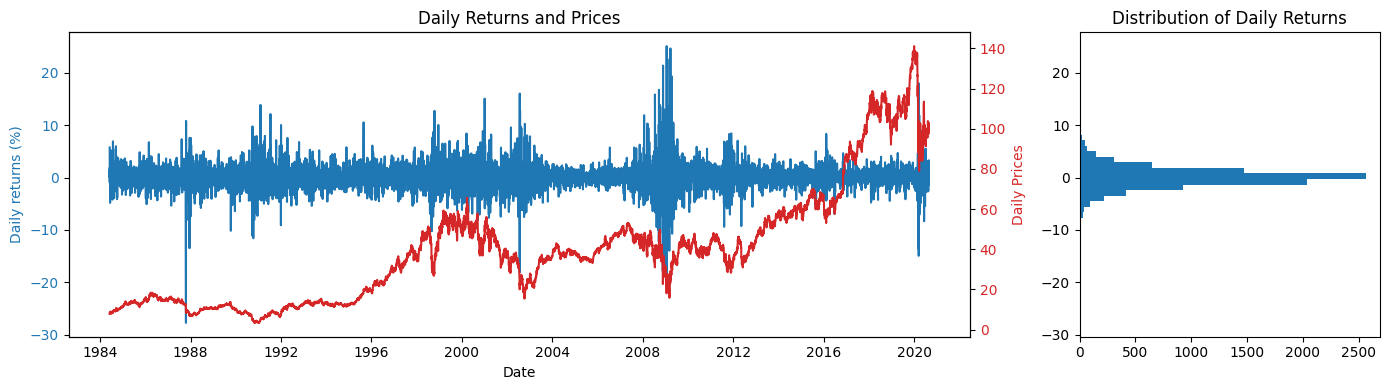

In [ ]:
# Compute daily returns: divide the first difference by the price in the previous day
daily_percentage_change = 100 * diff / prices.shift(1)

# drop the first value which is NaN
daily_percentage_change.dropna(inplace=True)

# Plot the results and original prices together
# initialize two subplots in 1 row and two columns. Also specify the width of each plot
fig, ax1 = plt.subplots(1, 2, figsize=(14, 4), gridspec_kw={"width_ratios": [3, 1]})

# subplot for daily_percentage_change
color = "tab:blue"
ax1[0].set_xlabel("Date")
ax1[0].set_ylabel("Daily returns (%)", color=color)
ax1[0].plot(daily_percentage_change, color=color)
ax1[0].tick_params(axis="y", labelcolor=color)

# Create twin axes, so they can share the same xaxis, i.e. Dates
ax2 = ax1[0].twinx()

# daily prices on the same subplot
color = "tab:red"
ax2.set_ylabel("Daily Prices", color=color)
ax2.plot(prices, color=color)
ax2.tick_params(axis="y", labelcolor=color)

plt.title("Daily Returns and Prices")

# create the second subplot which is the histogram of daily_percentage_change
ax1[1].hist(daily_percentage_change, bins=50, orientation="horizontal")
ax1[1].set_title("Distribution of Daily Returns")

fig.tight_layout()
plt.show()

Example - Return of Investiment

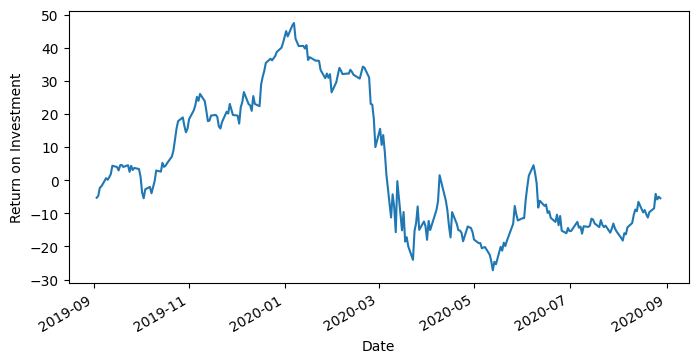

In [ ]:
# Net profit over a year (in working days)
net_profit = prices - prices.shift(260)

# Return on Investment
roi = 100 * net_profit / prices.shift(260)

# Plot result
roi["2019-09-01":"2020-08-28"].plot(figsize=(8, 4))
plt.ylabel("Return on Investment")
plt.show()

# 4. Resampling and converting frequencies

Pandas asfreq vs. resample

- `asfreq()` simply starts with the first data point and then takes consecutive data points at the new frequency interval
- `resample()` first splits the data into buckets based on the new frequency and then applies a particular operation to the data in each bucket


Downsampling

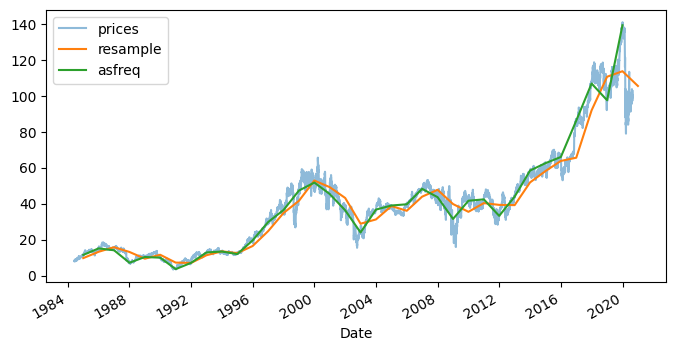

In [ ]:
# Create the figure
plt.figure(figsize=(8, 4))

# Plot the prices
prices.plot(alpha=0.5)

# Downsampling - end of the business year
# Variant 1: using resample()
prices.resample("BA").mean().plot()

# Variant 2: using asfreq()
prices.asfreq("BA").plot()

plt.legend(["prices", "resample", "asfreq"], loc="upper left")
plt.show()

Upsampling

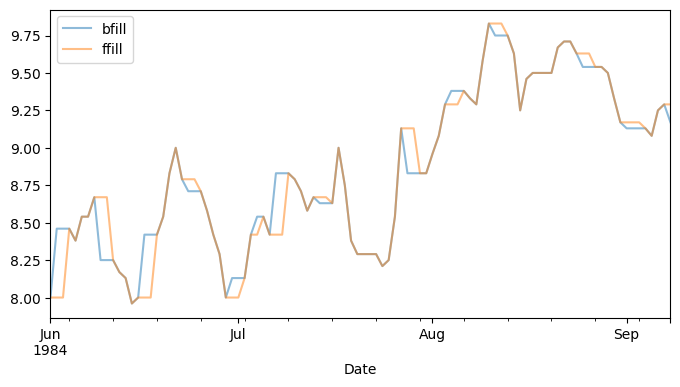

In [ ]:
# Create the figure
plt.figure(figsize=(8, 4))

# Upsampling
# "backward fill" - fill missing with the closest value on the right
prices.asfreq("D", method="bfill")[0:100].plot(alpha=0.5)

# "forward fill" - fill missing with the closest value on the left
prices.asfreq("D", method="ffill")[0:100].plot(alpha=0.5)

plt.legend(["bfill", "ffill"], loc="upper left")
plt.show()

Impact of downsampling on distribution of the data

Here are steps we take in the following:

- we use pct_change() function to calculate the price percentage changes
- we change the frequency of data using resample() function and the list ["B", "W", "M", "Q"]
- we take mean of the resampled data and drop null values generated in the previous steps
- we calculate the skewness and kurtosis of the data


Skewness and kurtosis inform us about the shape of a distribution. Skewness measures the degree of asymmetry around the center. For example, normal distribution is symmetric and has skewness 0. A skewness of smaller or larger than 0 indicates some degree of asymmetry. Kurtosis measures how the tails are stretched on both sides of the distribution. For instance, normal distribution has kurtosis 3, and kurtosis of larger than 3 indicates that the tails of the distribution are further stretched (are fat) compared to the normal distribution.

In [ ]:
from scipy.stats import skew, kurtosis

# calculate skewness and kurtosis for the resampled data
s, k = [], []
for freq in ["B", "W", "M", "Q"]:
    s.append(skew(prices.pct_change().resample(freq).mean().dropna()))
    k.append(kurtosis(prices.pct_change().resample(freq).mean().dropna()))

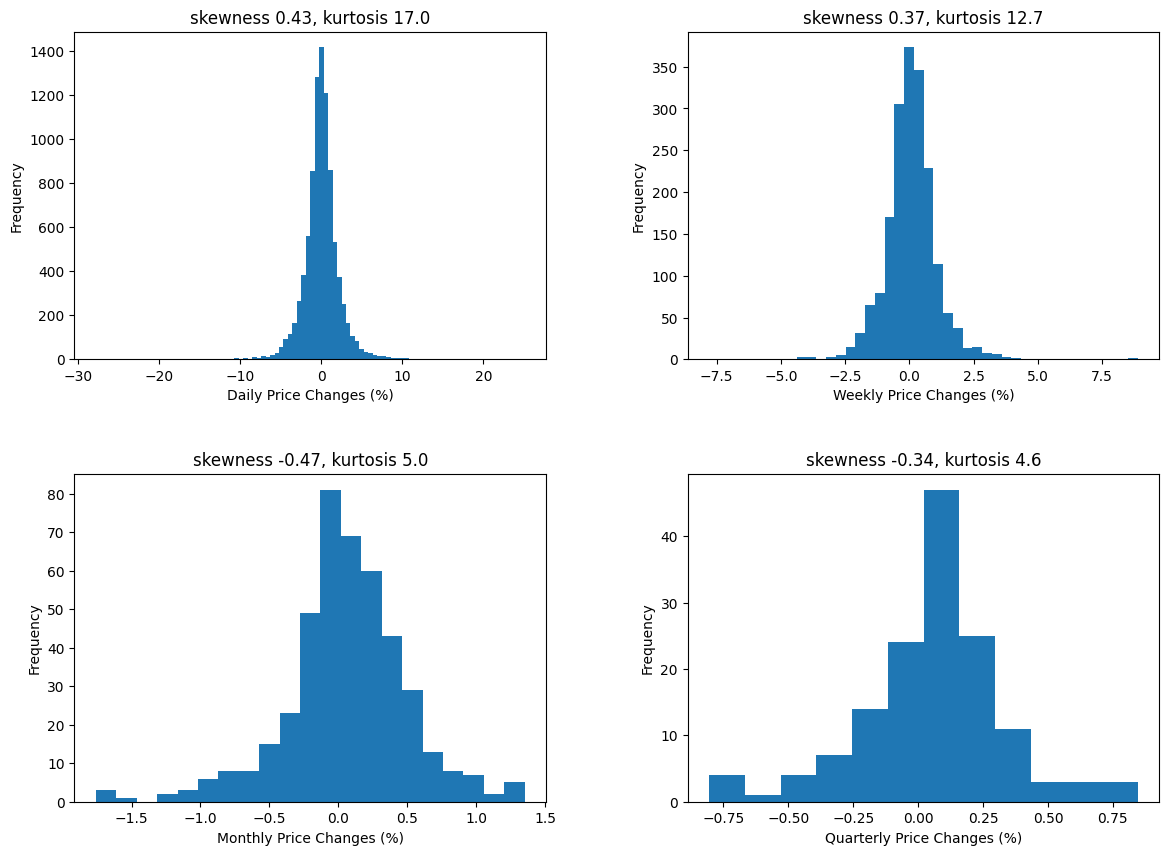

In [ ]:
fig, axes = plt.subplots(
    nrows=2, ncols=2, figsize=(14, 10), gridspec_kw={"hspace": 0.35, "wspace": 0.3}
)

for (ax, resamp, freq, n_bin, i) in zip(
    axes.flatten(),
    ["B", "W", "M", "Q"],  # resampling frequency
    ["Daily", "Weekly", "Monthly", "Quarterly"],  # x-axis labels
    [96, 44, 21, 12],  # number of bins
    [0, 1, 2, 3],  # skewness and kurtosis as titles
):

    ax.hist(100 * prices.pct_change().resample(resamp).mean(), n_bin)

    ax.set(
        xlabel=freq + " Price Changes (%)",
        ylabel="Frequency",
        title="skewness {:.2f}".format(s[i]) + ", kurtosis {:.1f}".format(3 + k[i]),
    )

plt.show()

# 5. Rolling windows

Example - rolling mean and standard deviation

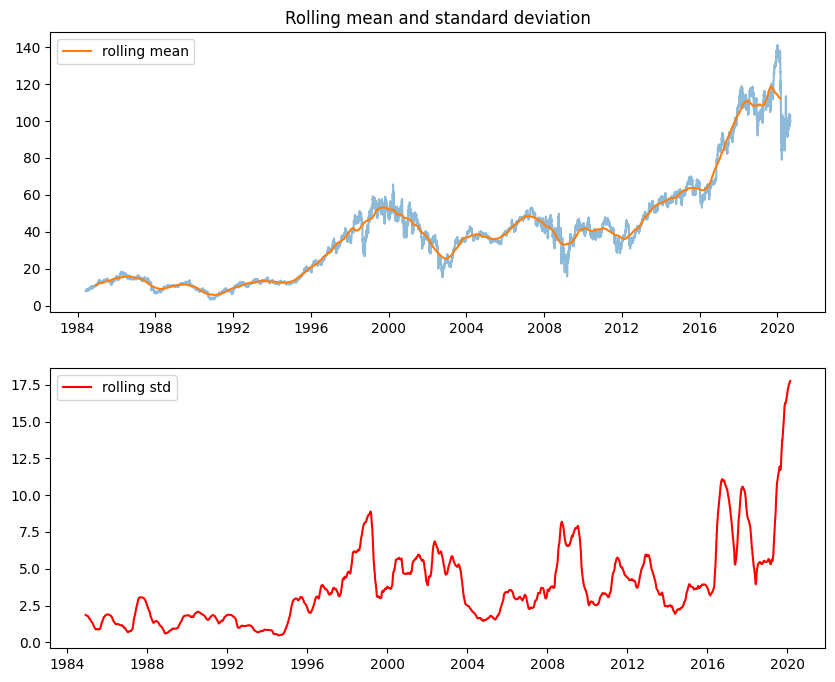

In [ ]:
# Compute rolling mean and std
rolling_mean_1year = prices.rolling(260, center=True).mean()
rolling_std_1year = prices.rolling(260, center=True).std()

# Setup plot
fig, axes = plt.subplots(2, figsize=(10, 8))

# Plot rolling mean and std
axes[0].set_title("Rolling mean and standard deviation")
axes[0].plot(prices, alpha=0.5)
axes[0].plot(rolling_mean_1year, label="rolling mean")
axes[0].legend()
axes[1].plot(rolling_std_1year, c="red", label="rolling std")
axes[1].legend()
plt.show()

Using rolling windows to detect outliers in time series

In [ ]:
def detect_outliers_rolling(timeseries, days=10, n_std=2, center=False):

    rolling_mean = timeseries.rolling(window=days, center=center).mean()
    rolling_std = timeseries.rolling(window=days, center=center).std()
    lower_bound = rolling_mean - (n_std * rolling_std)
    upper_bound = rolling_mean + (n_std * rolling_std)

    # Identify outliers
    mask = (timeseries < lower_bound) | (timeseries > upper_bound)
    outliers = timeseries[mask]

    # Plot bounds and outliers
    plt.figure(figsize=(12, 6))
    plt.plot(timeseries, "lightblue", label="Time series")
    plt.plot(rolling_mean, "orange", label="Rolling mean")
    plt.plot(upper_bound, "r--", label="Bounds", alpha=0.5)
    plt.plot(lower_bound, "r--", label="", alpha=0.5)
    plt.plot(outliers, "ro", markersize=5, label="Outlier candidate")
    plt.legend(loc="best")
    plt.grid(True)
    plt.title(
        "{} outliers detected using a moving window of size = {}".format(
            len(outliers), days
        )
    )
    plt.show()

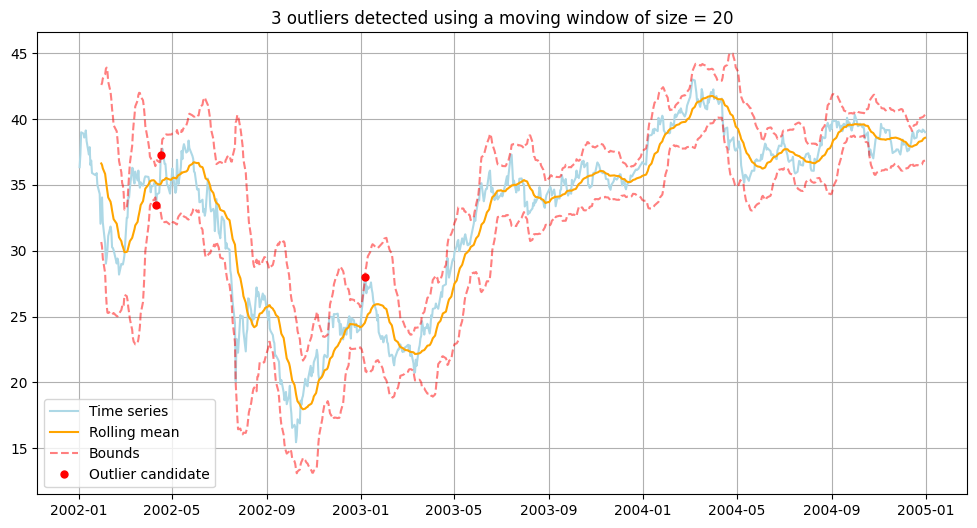

In [ ]:
detect_outliers_rolling(prices["2002":"2004"], days=20, n_std=3)

# 6. Exercise: temperature and weather data

Swiss Temperature Data
---

In this exercise we use [Swiss temperature data](https://www.meteoswiss.admin.ch/home/climate/swiss-climate-in-detail/Swiss-temperature-mean/Data-on-the-Swiss-temperature-mean.html) which describes the average temperature measured across various altitudes in Switzerland. The measurement has been available in monthly frequency since 1864 and is continuously updated with the most recent values. The objective is to explore the application of `period_range` with real data.


Create a date column with `period_range`  by going through the following steps:

1. Load the data from the file `c2_10.18751-Climate-Timeseries-CHTM-1.1-swiss.txt` in the Resource tab into a dataframe using the `time` column as the index. Check the shape and the data in order to answer the following __questions__. 

    - Are all years from 1864 to 2020 present in the data?
    - Are all months present in the data? 

__Remark__: If you open the txt file in a text editor or JupyterLab you can see that the actual table with the data is preceded by a few lines of meta data. The parameter `skiprows` in the `read_csv()` function might help.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv(
    "c2_10.18751-Climate-Timeseries-CHTM-1.1-swiss.txt",
    index_col="time",
    sep="\t",
    skiprows=15,
)

# Print the shape of the dataframe
print("Data shape: {}\n".format(data.shape))

print("First 5 years")
display(data.head())

print("Last 5 years")
display(data.tail())

Data shape: (157, 19)

First 5 years


jan   feb   mar   apr    may    jun    jul    aug    sep   oct   nov  \
time                                                                          
1864 -7.10 -4.52  0.04  2.11   7.43   9.48  12.37  10.95   8.59  3.50 -0.51   
1865 -3.47 -6.25 -5.91  7.03  10.09  10.98  13.99  11.16  11.90  5.19  1.26   
1866 -1.31 -0.42 -1.00  4.11   4.95  12.02  12.25   9.98   9.70  5.34 -0.20   
1867 -3.87  0.56 -0.13  3.49   7.74  10.57  11.29  12.93  10.43  2.92 -1.43   
1868 -5.46 -1.53 -2.30  2.33  12.04  11.97  12.89  12.50  11.12  4.76 -1.98   

       dec   djf   mam    jja   son  winter  summer  year  
time                                                       
1864 -4.47   NaN  3.19  10.93  3.86     NaN    8.49  3.16  
1865 -3.07 -4.73  3.74  12.04  6.12   -2.85   10.86  4.41  
1866 -0.49 -1.60  2.69  11.42  4.95    0.11    8.84  4.58  
1867 -5.80 -1.27  3.70  11.60  3.97    0.20    9.41  4.06  
1868  1.27 -4.26  4.02  12.45  4.63   -2.27   10.47  4.80

Last 5 years


jan   feb   mar   apr    may    jun    jul    aug    sep   oct   nov  \
time                                                                          
2016 -1.10 -0.19  0.14  4.57   7.88  11.97  15.09  14.80  12.54  5.38  1.82   
2017 -5.15  0.46  4.11  4.42   9.80  15.18  15.05  15.45   8.65  7.78  0.88   
2018  0.48 -5.21 -0.21  7.81  10.43  13.81  16.24  15.89  12.56  8.04  2.79   
2019 -4.37  0.73  2.27  4.47   6.08  15.25  16.21  15.10  11.37  8.45  1.51   
2020 -0.28  1.62  1.53  7.62   9.53  11.82  15.40  15.20    NaN   NaN   NaN   

       dec   djf   mam    jja   son  winter  summer  year  
time                                                       
2016 -0.11  0.32  4.19  13.95  6.58    1.87   11.14  6.07  
2017 -2.43 -1.60  6.11  15.23  5.77    1.09   11.43  6.18  
2018 -0.11 -2.39  6.01  15.31  7.80    0.21   12.79  6.88  
2019  0.78 -1.25  4.27  15.52  7.11    1.56   11.42  6.49  
2020   NaN  0.71  6.23  14.14   NaN    2.27     NaN   NaN

__Answers__:
- Yes, there are 157 rows representing yearly data from 1864 to 2020.
- We can see that the data stops after August 2020.

2. Select all the columns containing monthly data.

In [ ]:
# Select the first 12 columns
data_m = data.loc[:, "jan":"dec"]
data_m.head()

jan   feb   mar   apr    may    jun    jul    aug    sep   oct   nov  \
time                                                                          
1864 -7.10 -4.52  0.04  2.11   7.43   9.48  12.37  10.95   8.59  3.50 -0.51   
1865 -3.47 -6.25 -5.91  7.03  10.09  10.98  13.99  11.16  11.90  5.19  1.26   
1866 -1.31 -0.42 -1.00  4.11   4.95  12.02  12.25   9.98   9.70  5.34 -0.20   
1867 -3.87  0.56 -0.13  3.49   7.74  10.57  11.29  12.93  10.43  2.92 -1.43   
1868 -5.46 -1.53 -2.30  2.33  12.04  11.97  12.89  12.50  11.12  4.76 -1.98   

       dec  
time        
1864 -4.47  
1865 -3.07  
1866 -0.49  
1867 -5.80  
1868  1.27

3. We would like to build a new __dataframe__ with new __index__ and __columns__ 'Year', 'Month' and 'Temp', where each row represents a month:
    - use `stack()` to create the new dataframe (see the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.stack.html)  and examples therein). `stack()`  is a useful function for recreating dataframes and integrates the columns as part of the index. In fact, we get a multiIndex dataframe with the year as level=0 and the month as level=1.
    - reset the index of the new dataframe.
    - finally, give new names to the columns of the dataframe (see [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html) for how to change the name of columns).
    <br>You can do these three steps together in a single line or separately.

In [ ]:
df = data_m.stack().reset_index().rename(columns={0:"Temp", 'time':"Year", 'level_1':"Month"})

Let's check the head of the final dataframe:

In [ ]:
df.head()

Year Month  Temp
0  1864   jan -7.10
1  1864   feb -4.52
2  1864   mar  0.04
3  1864   apr  2.11
4  1864   may  7.43

4.  Create a date column `df['Date']` using `period_range`. Note that `period_range` requires setting several parameters. In particular, of the three parameters `start`, `end`, and `periods` exactly two must be specified. Finally, you need to specify the frequency parameter `freq`. Your data are in monthly frequency and you can find the appropriate frequency strings from [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases).
<br>You should set the `start` to be the first month e.g. '1864-jan'. You can ignore the end but then you have to specify the number of `periods`, here total number of months.

In [ ]:
df['Date'] = pd.period_range("1864-jan", periods=df.shape[0], freq="M")
df.head()

Year Month  Temp     Date
0  1864   jan -7.10  1864-01
1  1864   feb -4.52  1864-02
2  1864   mar  0.04  1864-03
3  1864   apr  2.11  1864-04
4  1864   may  7.43  1864-05

5. Set the `Date` column as your new index.

In [ ]:
df.set_index('Date', inplace=True)
df.head()

Year Month  Temp
Date                     
1864-01  1864   jan -7.10
1864-02  1864   feb -4.52
1864-03  1864   mar  0.04
1864-04  1864   apr  2.11
1864-05  1864   may  7.43

6. Finally plot the monthly temperatures. You should get the following plot:

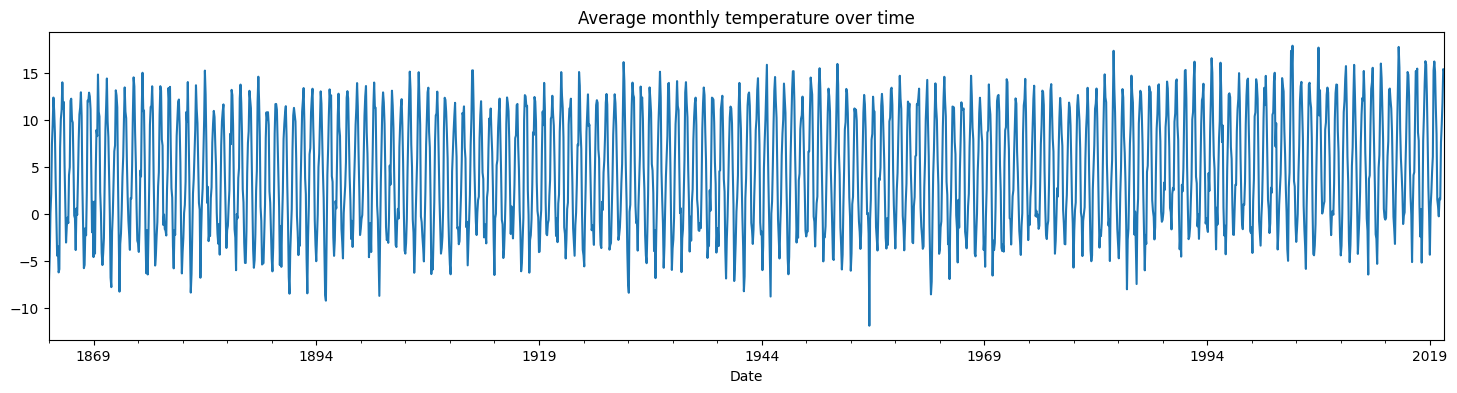

In [ ]:
df.Temp.plot(figsize=(18, 4))
plt.title("Average monthly temperature over time")
plt.show()

__Question__: What can you observe in this plot? What is hard to observe from the current plot?

__Answer__: 
There is a cyclical trend in the monthly temperatures. The repetitive peaks show the month with highest temperature at each year (often July) and the repetitive minimum values show the month with the lowest temperature each year (often January). However, it is not possible to see the changes within each year and difficult to see changes within and also over decades.

You might have noticed that the plot with monthly temperature is not very informative to see the trend of the temperature over the last two centuries. It will be easier to look at the average annual temperature.

7. Use `groupby()` to calculate the average annual temperatures and plot them over time.

<Axes: xlabel='Year'>

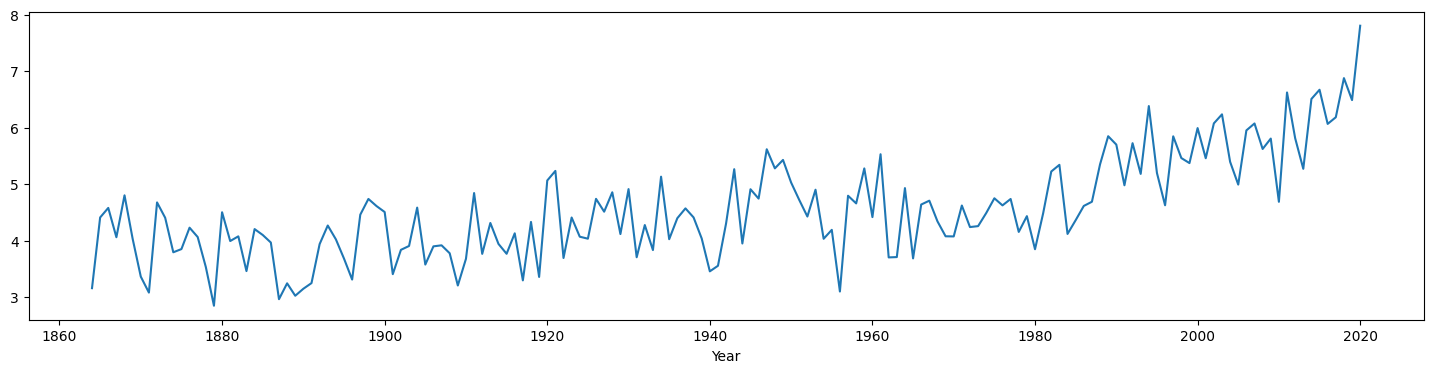

In [ ]:
df.groupby("Year")["Temp"].mean().plot(figsize=(18,4))

__Questions__: 
- If you consider the average annual temperature decade by decade, what do you observe?
- What do you observe if you compare the data of the first 100 years with the data of the last 50 years?

__Answers__: 
- We can observe the up and downs within each decade.
- The data of the first 100 years varies around the 4 degree mark, but is steay over time. In contrast, we can see an upward trend over the last 50 years.

8. Use `resample()` to calculate the average annual temperatures and plot them over time.

<Axes: xlabel='Date'>

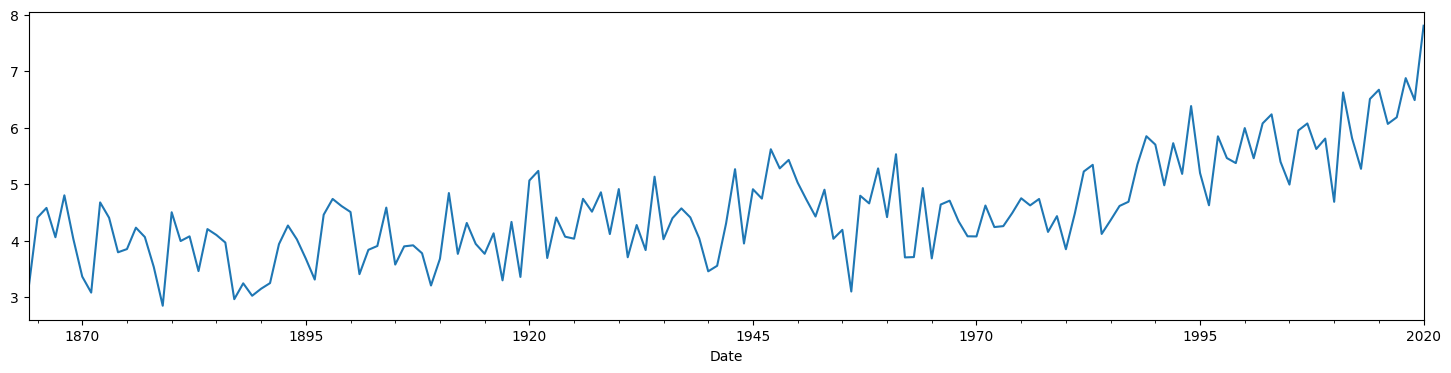

In [ ]:
df['Temp'].resample('A').mean().plot(figsize=(18,4))

__Question__: Do you get the same plot as in the previous case by `groupby()`?

__Answers__: Yes, with get the same plot using both `groupby()` and `resample()`. The `resample()` function has the advantage that we can aggregate the values in other frequencies such as month and quarter.

9. Use `rolling()` to calculate the average temperatures over a decade and plot them over time.

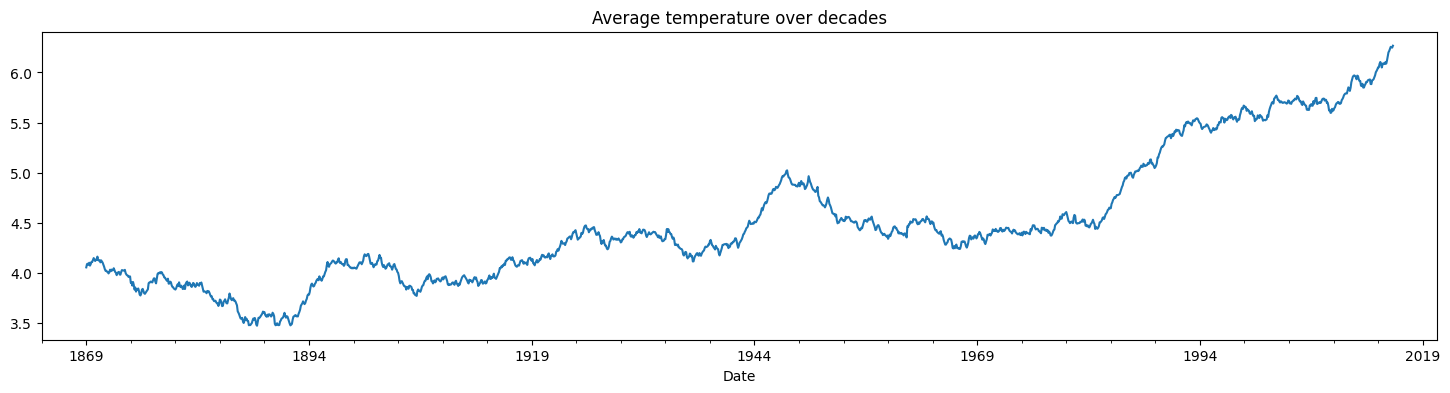

In [ ]:
df['Temp'].rolling(120, center=True).mean().plot(figsize=(18, 4))
plt.title('Average temperature over decades')
plt.show()

__Question__: Do you observe an upward trend in the temperatures?

__Answers__: Yes, averaging the values over every 10 years makes it easy to see the overall and upward pattern of the temperatures over the last two centuries.

****
__The case of missing values in the data__: 
Note that we could use  `period_range` easily as described above because we already knew that there is no missing month in the data. However, in case a month is missing the entire row will be dropped out when we stack the data which makes our final column `Date` misaligned (try this by deleting a value from the original data set and go through the steps and see the difference). There are two solutions (see below) when we know that there might be missing values in the data set:

- In step 3, set `dropna=False` when you stack the data `data_m.stack(dropna=False)`, and follow the next steps. By this we tell the stack function to keep the column with the missing value and let it to appear as a row with `NaN` value.
- In step 4, instead of using `period_range` to create dates, define a date column by using `df['Date']  = df['Year'].astype('str')+'-'+df['Month']`, and follow the next steps. 

In the first solution, the temporal order of the data remains in place and missing values appear as `NaN`s in front of their corresponding dates and you can see the gaps in the plot. However, in the second solution the chronological order of data will change in the sense that the months with missing temperature will not appear in the data and the plot.

Task 2: Szeged Weather data
---------------------------

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn

data = pd.read_csv("c2_weatherHistory.csv", index_col="Date", parse_dates=True)
data = data.sort_index()  # Make sure that the entries are sorted
data.head()

Summary  Temperature (C)  Humidity  \
Date                                                            
2006-01-01 00:00:00  Partly Cloudy         0.577778      0.89   
2006-01-01 01:00:00  Mostly Cloudy         1.161111      0.85   
2006-01-01 02:00:00  Mostly Cloudy         1.666667      0.82   
2006-01-01 03:00:00       Overcast         1.711111      0.82   
2006-01-01 04:00:00  Mostly Cloudy         1.183333      0.86   

                     Wind Speed (km/h)  Wind Bearing (degrees)  \
Date                                                             
2006-01-01 00:00:00            17.1143                     140   
2006-01-01 01:00:00            16.6152                     139   
2006-01-01 02:00:00            20.2538                     140   
2006-01-01 03:00:00            14.4900                     140   
2006-01-01 04:00:00            13.9426                     134   

                     Visibility (km)  
Date                                  
2006-01-01 00:00:00           9.9820  
2006-01-01 01:00:00           9.9015  
2006-01-01 02:00:00           9.9015  
2006-01-01 03:00:00           9.9015  
2006-01-01 04:00:00           9.9015

In [ ]:
data = data["Temperature (C)"]
data = data["2006-01-01":"2009-12-31"]
data.head()

Date
2006-01-01 00:00:00    0.577778
2006-01-01 01:00:00    1.161111
2006-01-01 02:00:00    1.666667
2006-01-01 03:00:00    1.711111
2006-01-01 04:00:00    1.183333
Name: Temperature (C), dtype: float64

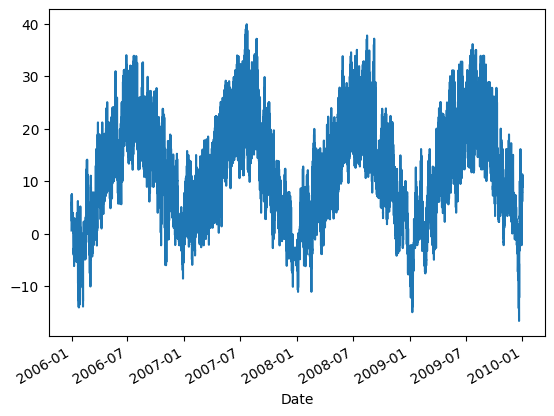

In [ ]:
data.plot()
plt.show()

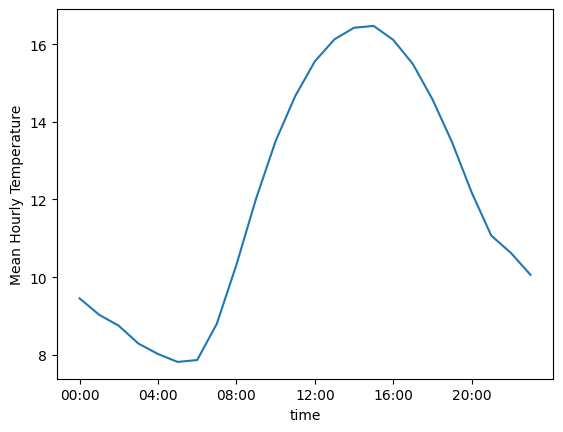

In [ ]:
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks)
plt.ylabel("Mean Hourly Temperature")
plt.show()

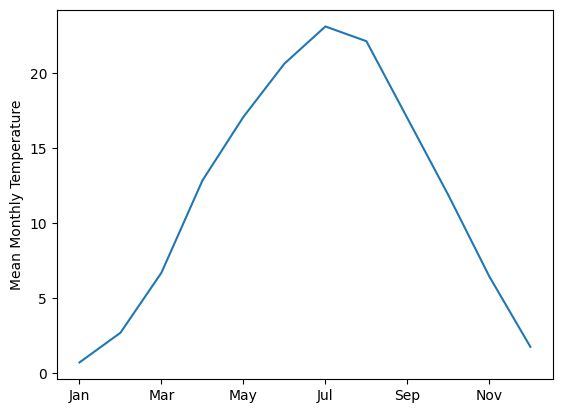

In [ ]:
by_month = data.groupby(data.index.month).mean()
by_month.index = [
    "Jan",
    "Feb",
    "Mar",
    "Apr",
    "May",
    "Jun",
    "Jul",
    "Aug",
    "Sep",
    "Oct",
    "Nov",
    "Dec",
]
monthly_ticks = 2 * np.arange(6)
plt.ylabel("Mean Monthly Temperature")
by_month.plot(xticks=monthly_ticks)
plt.show()

# 7. Trends and cycles

In [ ]:
# load the data
data = pd.read_csv(
    "c2_10.18751-Climate-Timeseries-CHTM-1.1-swiss.txt",
    index_col="time",
    sep="\t",
    skiprows=15,
)

# Print the shape of the dataframe
print(data.shape)

# Select the first 12 columns
data_m = data.loc[:, "jan":"dec"]

# Create a new dataframe with new index and columns 'Year', 'Month' and 'Temp'
df = (
    data_m.stack()  # create a multi-index dataframe with the year at level 0 and the month at level 1
    .reset_index()  # reset the index of the new dataframe
    .rename(
        columns={0: "Temp", "time": "Year", "level_1": "Month"}
    )  # give new names to the columns
)
# Create dates
df["Date"] = pd.date_range("1864-jan", periods=df.shape[0], freq="M")

# Let the dates to be the index
df.set_index("Date", inplace=True)

(157, 19)


In [ ]:
df.head()

Year Month  Temp
Date                        
1864-01-31  1864   jan -7.10
1864-02-29  1864   feb -4.52
1864-03-31  1864   mar  0.04
1864-04-30  1864   apr  2.11
1864-05-31  1864   may  7.43

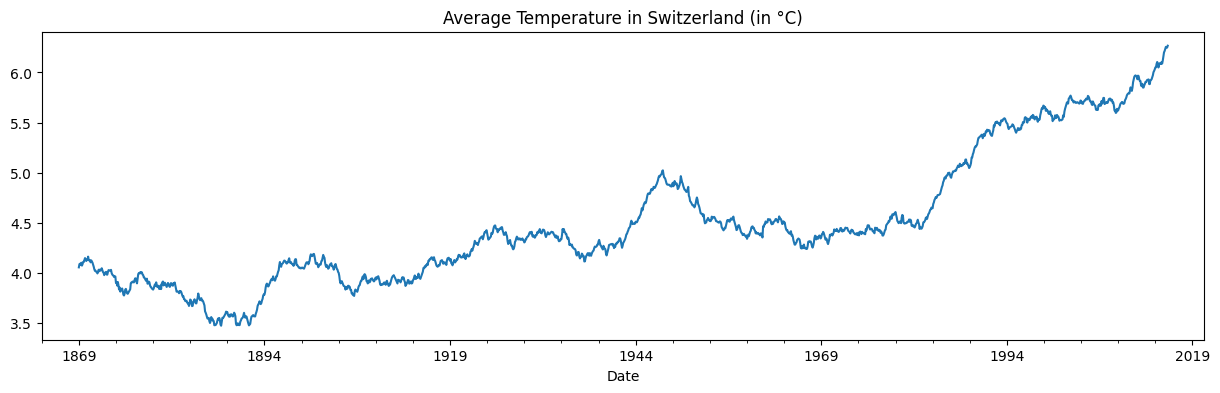

In [ ]:
# set the figure size
plt.figure(figsize=(15, 4))

# plot the Temperature
df["Temp"].rolling(120, center=True).mean().plot()  # 120 months : 10 years
plt.title("Average Temperature in Switzerland (in °C)")
plt.show()

Seasonality in the Swiss temperature data

/home/miguel/.pyenv/versions/3.9/envs/epfl_extension_school/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/miguel/.pyenv/versions/3.9/envs/epfl_extension_school/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/miguel/.pyenv/versions/3.9/envs/epfl_extension_school/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/miguel/.pyenv/versions/3.9/envs/epfl_extension_school/lib/python3.9/site-packages/seaborn/_

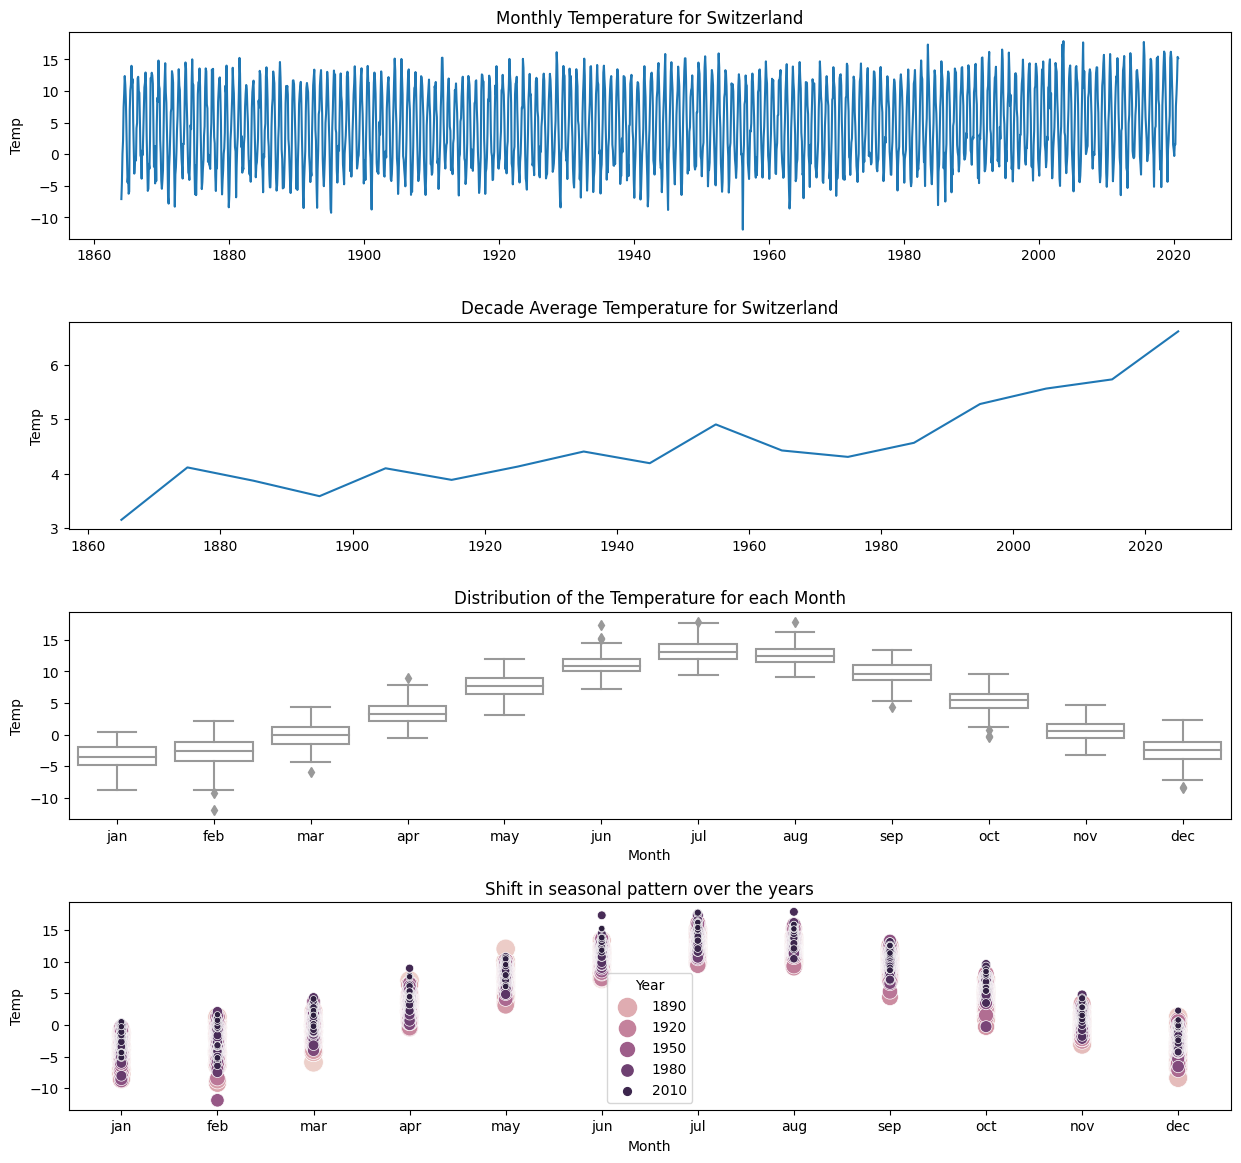

In [ ]:
import seaborn as sns

# defining the number of subplots, setting the size, and the space between the subplots
fig, axes = plt.subplots(4, 1, figsize=(15, 14), gridspec_kw={"hspace": 0.4})

# 1st plot: line plot of monthly temperature
axes[0].plot(df["Temp"])
axes[0].set_title("Monthly Temperature for Switzerland")
axes[0].set_ylabel("Temp")

# 2nd plot: line plot of average temperature per decade (A: annual)
axes[1].plot(df["Temp"].resample("10A").mean())
axes[1].set_title("Decade Average Temperature for Switzerland")
axes[1].set_ylabel("Temp")

# 3rd plot: box plot of monthly temperature for every month
sns.boxplot(data=df, x="Month", y="Temp", color="white", ax=axes[2])
axes[2].set_title("Distribution of the Temperature for each Month")

# 4th plot: scatter plot of monthly temperature against month
sns.scatterplot(data=df, x="Month", y="Temp", hue="Year", size="Year", sizes=(200, 20))
axes[3].set_title("Shift in seasonal pattern over the years")

plt.show()

# 8. Temporal dependencies in time series data

__Time dependency in the unemployment rates__

In [ ]:
# load unemployment rates
data = pd.read_csv("c2_LMUNRRTTCHQ156S.csv", index_col="DATE")
data.index = pd.to_datetime(data.index, format="%Y-%m-%d")

data.shape

(197, 1)

In [ ]:
# check a few values at the end of the data
data.tail()


LMUNRRTTCHQ156S
DATE                       
2018-01-01         2.880751
2018-04-01         2.656838
2018-07-01         2.544365
2018-10-01         2.446708
2019-01-01         2.393524

In [ ]:
# let's get more information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 197 entries, 1970-01-01 to 2019-01-01
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   LMUNRRTTCHQ156S  197 non-null    float64
dtypes: float64(1)
memory usage: 3.1 KB


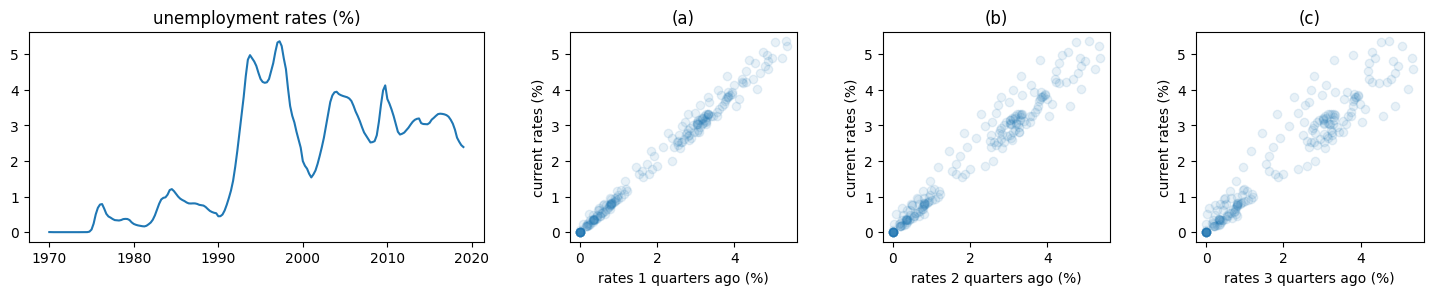

In [ ]:
fig, axes = plt.subplots(
    nrows=1,
    ncols=4,
    figsize=(18, 3),
    gridspec_kw={"wspace": 0.3, "width_ratios": [2, 1, 1, 1]},
)

# the first plot on the left
axes[0].plot(data)
axes[0].set(title="unemployment rates (%)")

for (ax, lag, t) in zip(axes[1:].flatten(),     # get the axes, ignore axes[0], it is already plotted and titled 
                        [1, 2, 3],              # get the lags of 1,2 and 3 quarters in 'lag'
                        ["(a)", "(b)", "(c)"]): # get the titles in 't'

    ax.scatter(data[:-lag], data[lag:], alpha=0.1)  
    ax.set(
        xlabel="rates " + str(lag) + " quarters ago (%)",
        ylabel="current rates (%)",
        title=str(t),
    )
    
# adjust the spaces
fig.subplots_adjust(bottom=0.2, top=0.9)
plt.show()

__Pandas function for visualization of time dependency__

First we load the different datasets.

In [ ]:
from pandas.plotting import lag_plot

# load stock prices
data = pd.read_csv("c2_financial_data.csv", index_col="Date")
data.index = pd.to_datetime(data.index, format="%d.%m.%y")
prices = data["Close"]

# load GDP data
gdp = pd.read_csv("c2_CPMNACSAB1GQCH.csv", index_col="DATE")
gdp.index = pd.to_datetime(gdp.index, format="%Y-%m-%d")

#  load temperature data
temp = pd.read_csv(
    "c2_daily-min-temperatures.txt", parse_dates=["Date"], index_col="Date"
)

# generate random numbers from standard normal distribution
np.random.seed(5)
data_numbers = pd.DataFrame(
    np.random.normal(size=240),
    columns=["random_numbers"],
    index=pd.date_range("2001-jan", periods=240, freq="M"),
)

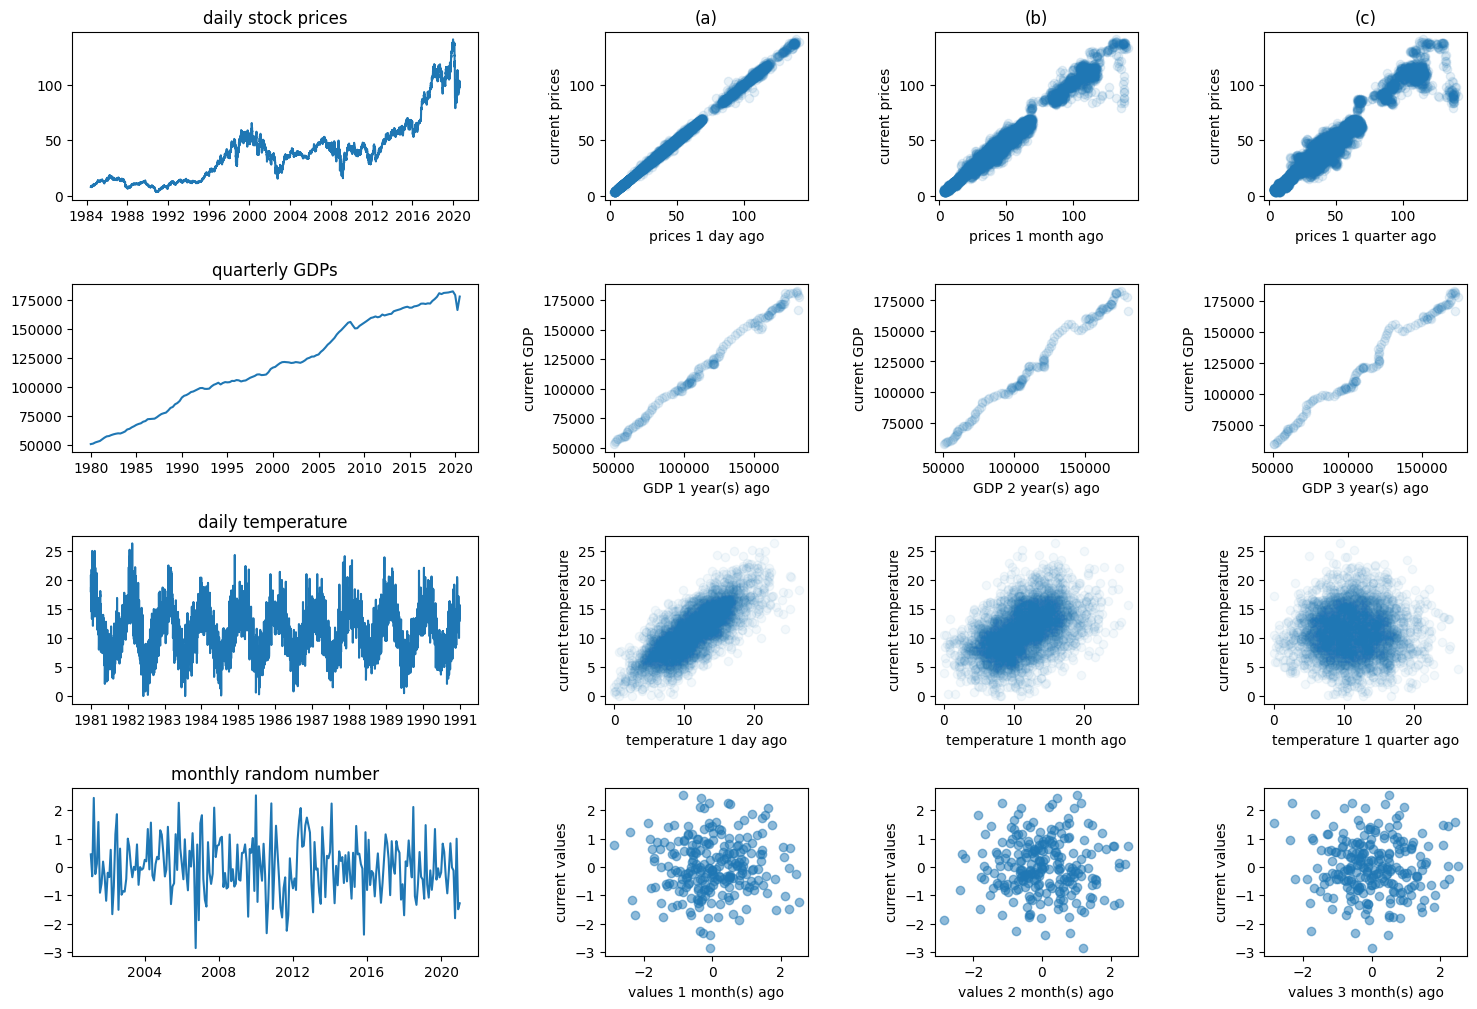

In [ ]:
fig, axes = plt.subplots(
    nrows=4,
    ncols=4,
    figsize=(18, 12),
    gridspec_kw={"hspace": 0.5, "wspace": 0.5, "width_ratios": [2, 1, 1, 1]},
)

# plot data in the first column
# axes goes from row 0 to row 3, but the column remains 0
axes[0, 0].plot(prices)
axes[1, 0].plot(gdp)
axes[2, 0].plot(temp)
axes[3, 0].plot(data_numbers)

# set titles for the plots in the first column
axes[0, 0].set(title="daily stock prices")
axes[1, 0].set(title="quarterly GDPs")
axes[2, 0].set(title="daily temperature ")
axes[3, 0].set(title="monthly random number")

#  plot stock prices
for (ax, lag, _lag, t) in zip(
    axes[0, 1:].flatten(),
    [1, 21, 61],
    ["day", "month", "quarter"],
    ["(a)", "(b)", "(c)"],
):

    lag_plot(prices, lag=lag, ax=ax, alpha=0.1)
    ax.set(
        xlabel="prices 1 " + str(_lag) + " ago",
        ylabel="current prices",
        title=str(t),
    )

#  plot GDP data
for (ax, lag) in zip(axes[1, 1:].flatten(), [4, 8, 12]):

    lag_plot(gdp, lag=lag, ax=ax, alpha=0.1)
    ax.set(xlabel="GDP " + str(int(lag / 4)) + " year(s) ago", ylabel="current GDP")

#  plot temperature data
for (ax, lag, _lag) in zip(
    axes[2, 1:].flatten(), [1, 30, 90], ["day", "month", "quarter"]
):

    lag_plot(temp, lag=lag, ax=ax, alpha=0.05)
    ax.set(xlabel="temperature 1 " + str(_lag) + " ago", ylabel="current temperature")

# plot random numbers
for (ax, lag) in zip(axes[3, 1:].flatten(), [1, 2, 3]):

    lag_plot(data_numbers, lag=lag, ax=ax, alpha=0.5)
    ax.set(xlabel="values " + str(lag) + " month(s) ago", ylabel="current values")

plt.show()

# 9. Stationary and non-stationary data

__Non-stationarity in time series data__

In [ ]:
# load data
data = pd.read_csv("c2_financial_data.csv", index_col="Date")
data.index = pd.to_datetime(data.index, format="%d.%m.%y")

prices = data["Close"]

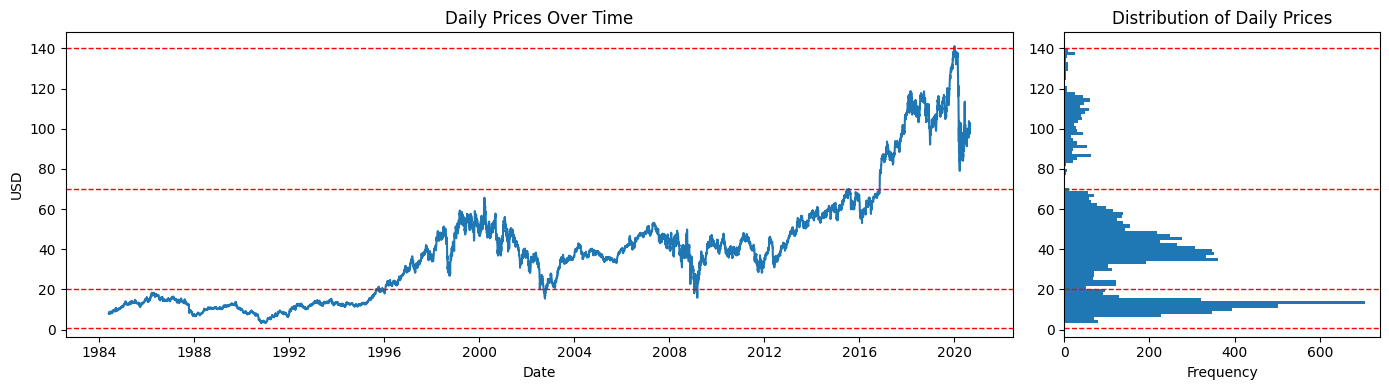

In [ ]:
# Plot the trend and histogram of prices together
# initialize two subplots in 1 row and 2 columns. Also specify the size and width of each plot
fig, ax = plt.subplots(1, 2, figsize=(14, 4), gridspec_kw={"width_ratios": [3, 1]})

# create the first plot for the prices over time
ax[0].plot(prices)
ax[0].set_title("Daily Prices Over Time")
ax[0].set_xlabel("Date")
ax[0].set_ylabel("USD")

# let's draw the horizontal red lines at some pre-set values
for i in [1, 20, 70, 140]:
    ax[0].axhline(i, color="r", linewidth=1, linestyle="--")

# create the histogram of prices in the second plot
ax[1].hist(prices, bins=90, orientation="horizontal")
ax[1].set_title("Distribution of Daily Prices")
ax[1].set_xlabel("Frequency")

# draw again the horizontal lines
for i in [1, 20, 70, 140]:
    ax[1].axhline(i, color="r", linewidth=1, linestyle="--")

fig.tight_layout()
plt.show()

This is an example of non-stationary data. Firstly, the price has an increasing trend over the whole period, i.e., the price level is not the same over time. Secondly, we note that from 1984 to 1996, the price varies between about 1 to 20 dollars. This range is about 20 to 70 dollars from 1996 to 2016 and 70 to 140 dollars from 2016 to 2020. In short, the level and variance of the prices change over time.

# 10. Decomposition of data into trends and cycles

__Trends and cycles in simulated time series data__

$y_t=level+trend_t+cycle_t+randomness_t$

__Python functions for generating the predictable components__

In the following, we generate a deterministic process with a constant, a trend, and a 3-period seasonal term.

In [ ]:
from statsmodels.tsa.deterministic import DeterministicProcess

#  create the time index
index = pd.period_range("2021-01-01", freq="M", periods=12)

# create the deterministic components
det_components = DeterministicProcess(
    index, constant=True, order=1, seasonal=True, period=3, fourier=0
)
det_components.in_sample()

const  trend  s(2,3)  s(3,3)
2021-01    1.0    1.0     0.0     0.0
2021-02    1.0    2.0     1.0     0.0
2021-03    1.0    3.0     0.0     1.0
2021-04    1.0    4.0     0.0     0.0
2021-05    1.0    5.0     1.0     0.0
2021-06    1.0    6.0     0.0     1.0
2021-07    1.0    7.0     0.0     0.0
2021-08    1.0    8.0     1.0     0.0
2021-09    1.0    9.0     0.0     1.0
2021-10    1.0   10.0     0.0     0.0
2021-11    1.0   11.0     1.0     0.0
2021-12    1.0   12.0     0.0     1.0

We set the level to be 25, the time trend to be multiplied by 0.5 and leave the coefficients for the dummies to be 1.

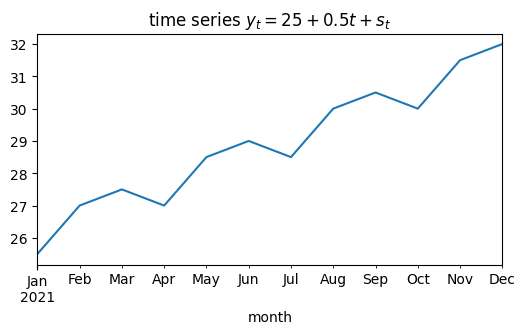

In [ ]:
# convert the components to numpy arrays
det_terms = det_components.in_sample().to_numpy()

# create parameters
params = np.array([25, 0.5, 1, 1])

# create the time series y
y = pd.Series(det_terms.dot(params), index=index)

# plot y
y.plot(figsize=(6, 3))
plt.title("time series $y_{t}=25+0.5t+s_{t}$")
plt.xlabel("month")
plt.show()

__Upward trend with a seasonal component__

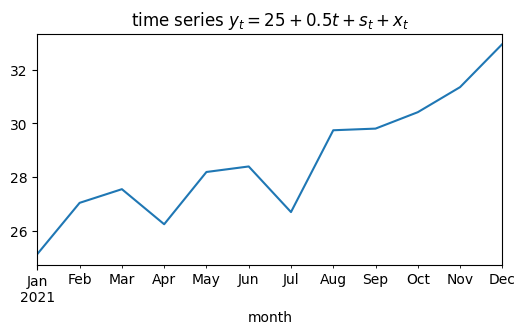

In [ ]:
# create the random noise x
x = np.random.normal(size=12)

# create the time series y
y = pd.Series(det_terms.dot(params) + x, index=index)

# plot y
y.plot(figsize=(6, 3))
plt.title("time series $y_{t}=25+0.5t+s_{t}+x_{t}$")
plt.xlabel("month")
plt.show()

__Lagged values__

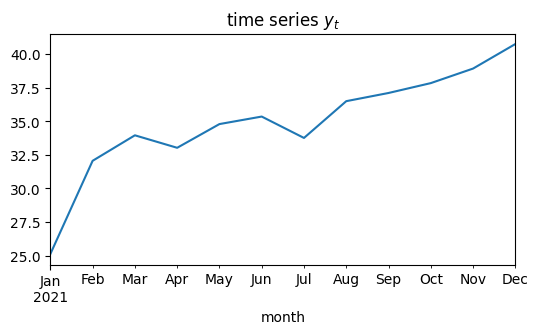

In [ ]:
# initialize the process
y = np.empty(12)
y[0] = det_terms[0].dot(params) + x[0]

# create the time series y
for t in range(1, 12):
    y[t] = 0.2 * y[t - 1] + det_terms[t].dot(params) + x[t]
y = pd.Series(y, index=index)


# plot y
y.plot(figsize=(6, 3))
plt.title("time series $y_{t}$")
plt.xlabel("month")
plt.show()

__Python functions for the decomposition of time series data__

In [ ]:
# load the data
data = pd.read_csv("c2_homog_mo_BER.txt", skiprows=27, sep="\s+")

# create time index
data["Date"] = data["Year"].astype("str") + "-" + data["Month"].astype("str")
data["Date"] = pd.to_datetime(data["Date"])
data.set_index("Date", inplace=True)
data.index.name = "Date"

# check a few rows of data
data.head()

Year  Month  Temperature  Precipitation
Date                                               
1864-01-01  1864      1         -7.6           22.5
1864-02-01  1864      2         -1.8           26.5
1864-03-01  1864      3          3.9           57.1
1864-04-01  1864      4          6.5           55.1
1864-05-01  1864      5         11.9           68.5

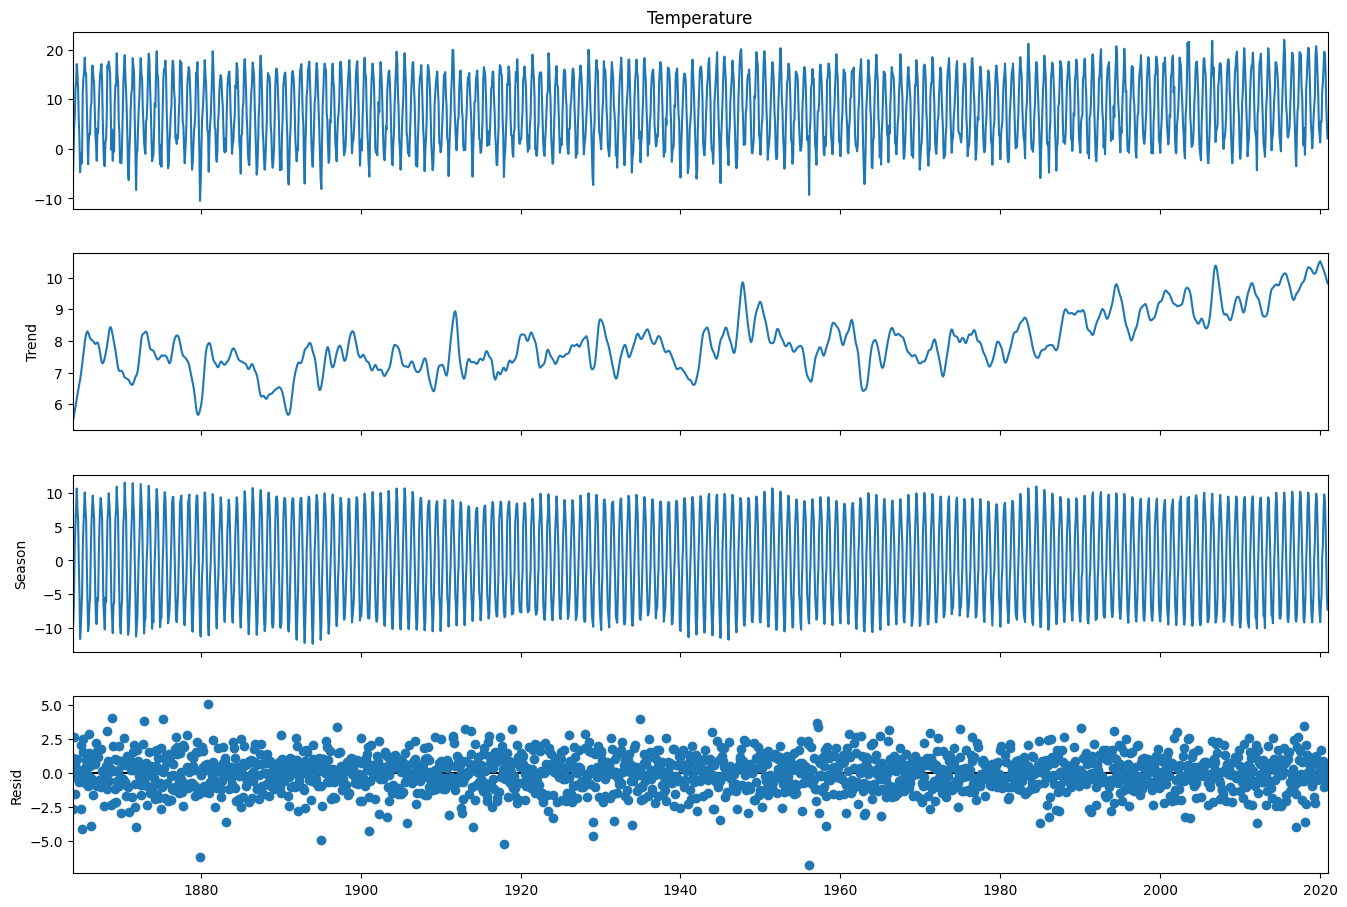

In [ ]:
from statsmodels.tsa.seasonal import STL

# decomposition
res = STL(data["Temperature"]).fit()
fig = res.plot()

fig.set_size_inches(15, 10)
plt.show()

# 11. Detecting autocorrelation in data

__Autocorrelation in simulated time series data__

In [ ]:
from pandas.plotting import autocorrelation_plot, lag_plot

# generate the random component
x_t = pd.Series(np.random.normal(size=100))

level = 25

# time series y_t
y_t = level + x_t

In [ ]:
# set the number of lag to be 1
n = 1

# calculate the autocorrelation for the 1st lag
print("autocorr with the 1st lag: {:.3f}".format(y_t.autocorr(n)))

# this is equivalent to
print("correlation with the 1st lag: {:.3f}".format(y_t.corr(y_t.shift(n))))

# and also to
print("correlation with the 1st lead: {:.3f}".format(y_t.corr(y_t.shift(-n))))

autocorr with the 1st lag: -0.155
correlation with the 1st lag: -0.155
correlation with the 1st lead: -0.155


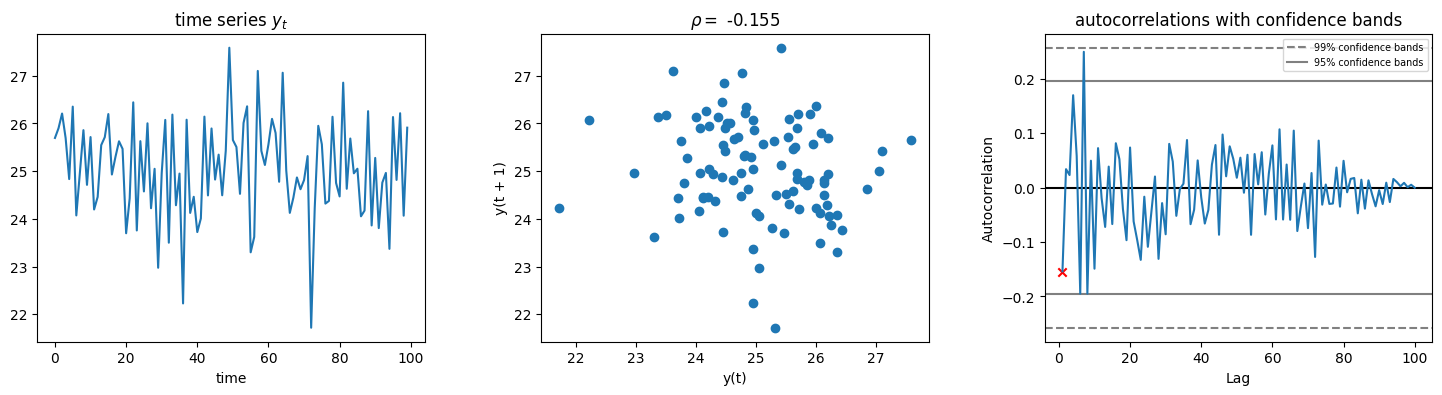

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 4), gridspec_kw={"wspace": 0.3})

# the 1st plot on the left: plot y_t
y_t.plot(ax=axes[0])
axes[0].set_title("time series $y_{t}$")
axes[0].set_xlabel("time")

# the middle plot: scatter plot of y_t against its 1st lag
lag_plot(y_t, ax=axes[1])
axes[1].set_title(r"$\rho = $ {:.3f}".format(y_t.autocorr(1)))

# the 1st plot on the right: autocorrelations up to 100 lags
autocorrelation_plot(y_t, ax=axes[2])
axes[2].set_title("autocorrelations with confidence bands")
axes[2].legend(["99% confidence bands", "95% confidence bands"], fontsize="x-small")
axes[2].grid()

# let's put a red cross on the 1st autocorrelation value
axes[2].scatter(1, y_t.autocorr(1), marker="x", c="red")

plt.show()

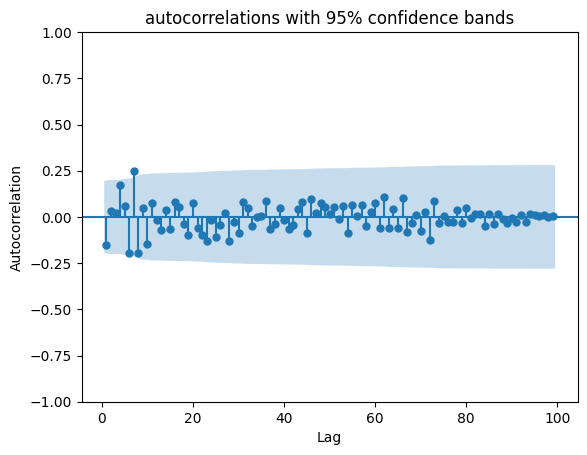

In [ ]:
# load the module
import statsmodels.api as sm

sm.graphics.tsa.plot_acf(y_t, lags=99, alpha=0.05, zero=False)
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("autocorrelations with 95% confidence bands")
plt.show()

__Adding time dependency in the simulated data and varying it from 1 to 0.1__

Strong correlation (particularly from smaller lags)

In [ ]:
# initialize the values with zero
y_t = np.zeros(100)

# generate the time series, x_t is the random component from the previous example
for i in range(1, 100):
    y_t[i] = y_t[i - 1] + x_t[i]

y_t = pd.Series(y_t)

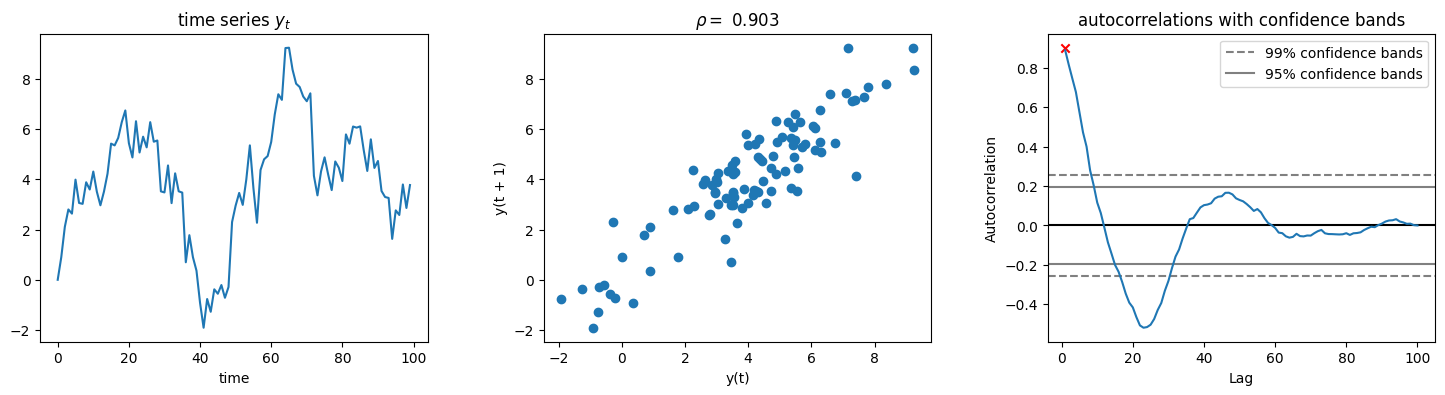

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 4), gridspec_kw={"wspace": 0.3})

y_t.plot(ax=axes[0])
axes[0].set_title("time series $y_{t}$")
axes[0].set_xlabel("time")

lag_plot(y_t, ax=axes[1])
axes[1].set_title(r"$\rho = $ {:.3f}".format(y_t.autocorr(1)))

autocorrelation_plot(y_t, ax=axes[2])
axes[2].set_title("autocorrelations with confidence bands")
axes[2].grid()
axes[2].scatter(1, y_t.autocorr(1), marker="x", c="red")
axes[2].legend(["99% confidence bands", "95% confidence bands"])

plt.show()

Weaker correlation (trend_param = 0.5)

In [343]:
y_t = np.zeros(100)

# generate the time series, x_t is the random component from the previous example
for i in range(1, 100):
    y_t[i] = 0.5 * y_t[i - 1] + x_t[i]

y_t = pd.Series(y_t)

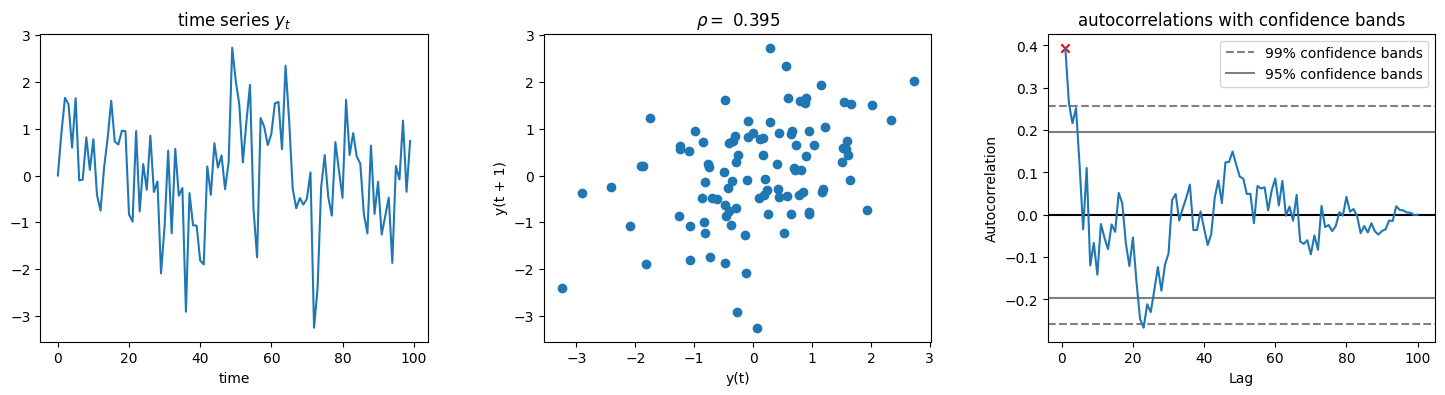

In [344]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 4), gridspec_kw={"wspace": 0.3})

y_t.plot(ax=axes[0])
axes[0].set_title("time series $y_{t}$")
axes[0].set_xlabel("time")

lag_plot(y_t, ax=axes[1])
axes[1].set_title(r"$\rho = $ {:.3f}".format(y_t.autocorr(1)))

autocorrelation_plot(y_t, ax=axes[2])
axes[2].set_title("autocorrelations with confidence bands")
axes[2].grid()
axes[2].scatter(1, y_t.autocorr(1), marker="x", c="red")
axes[2].legend(["99% confidence bands", "95% confidence bands"])

plt.show()

In [345]:
y_t = np.zeros(100)

# generate the time series, x_t is the random component from the previous example
for i in range(1, 100):
    y_t[i] = 0.1 * y_t[i - 1] + x_t[i]

y_t = pd.Series(y_t)

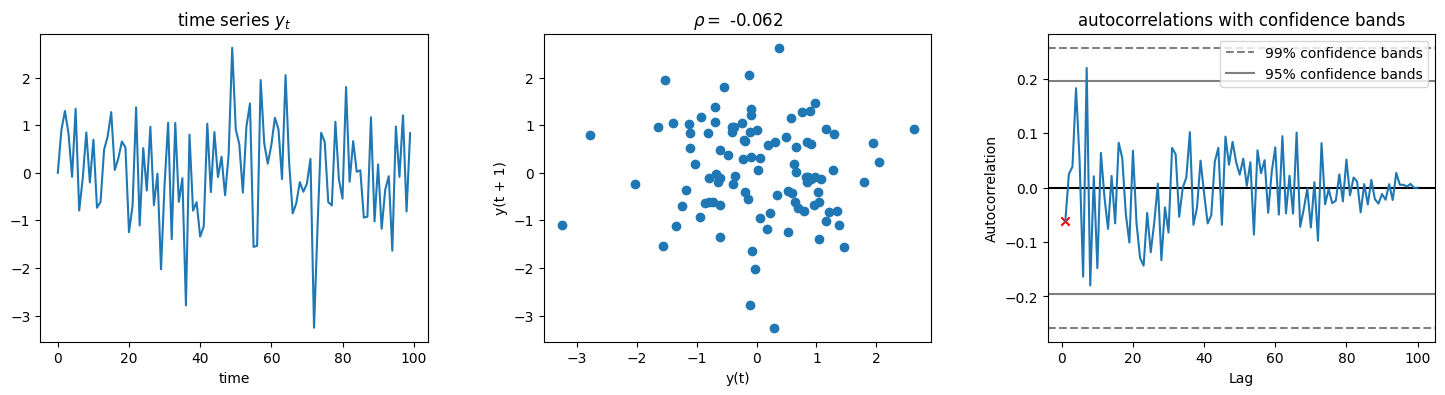

In [346]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 4), gridspec_kw={"wspace": 0.3})

y_t.plot(ax=axes[0])
axes[0].set_title("time series $y_{t}$")
axes[0].set_xlabel("time")

lag_plot(y_t, ax=axes[1])
axes[1].set_title(r"$\rho = $ {:.3f}".format(y_t.autocorr(1)))

autocorrelation_plot(y_t, ax=axes[2])
axes[2].set_title("autocorrelations with confidence bands")
axes[2].grid()
axes[2].scatter(1, y_t.autocorr(1), marker="x", c="red")
axes[2].legend(["99% confidence bands", "95% confidence bands"])

plt.show()

So far in this unit, we learned that it is essential to check the autocorrelation before starting to model time series data. The __presence of autocorrelation__ in a time series indicates that we should __include lags in our model__ to capture the time series dynamic. We also learned that confidence bands are one way to check if autocorrelations are significant or not. In the following, we briefly discuss how to test the significance of autocorrelations.

__Statistical test of autocorrelations__

In [347]:
y_t = np.zeros(100)

# generate the time series, x_t is the random component from the previous example
for i in range(1, 100):
    y_t[i] = 0.5 * y_t[i - 1] + x_t[i]

# testing the significance of autocorrelations for the first 2 lags
sm.stats.acorr_ljungbox(y_t, lags=[2], return_df=True)

lb_stat  lb_pvalue
2  23.228439   0.000009

The p-value is way below the 0.05 significance level, which means that we can reject the null hypothesis in favor of the alternative that at least one of the two autocorrelations is not zero in population.

__Autocorrelation in real data__

In [348]:
# load unemployment rates
unemp = pd.read_csv("c2_LMUNRRTTCHQ156S.csv", index_col="DATE")
unemp.index = pd.to_datetime(unemp.index, format="%Y-%m-%d")

# load GDP data
gdp = pd.read_csv("c2_CPMNACSAB1GQCH.csv", index_col="DATE")
gdp.index = pd.to_datetime(gdp.index, format="%Y-%m-%d")

# load stock prices
data = pd.read_csv("c2_financial_data.csv", index_col="Date")
data.index = pd.to_datetime(data.index, format="%d.%m.%y")
prices = data["Close"]

# load temperature data
temp = pd.read_csv(
    "c2_daily-min-temperatures.txt", parse_dates=["Date"], index_col="Date"
)

# generate random noise
np.random.seed(5)
noise = pd.DataFrame(
    np.random.normal(size=240),
    columns=["noise"],
    index=pd.date_range("2001-jan", periods=240, freq="M"),
)

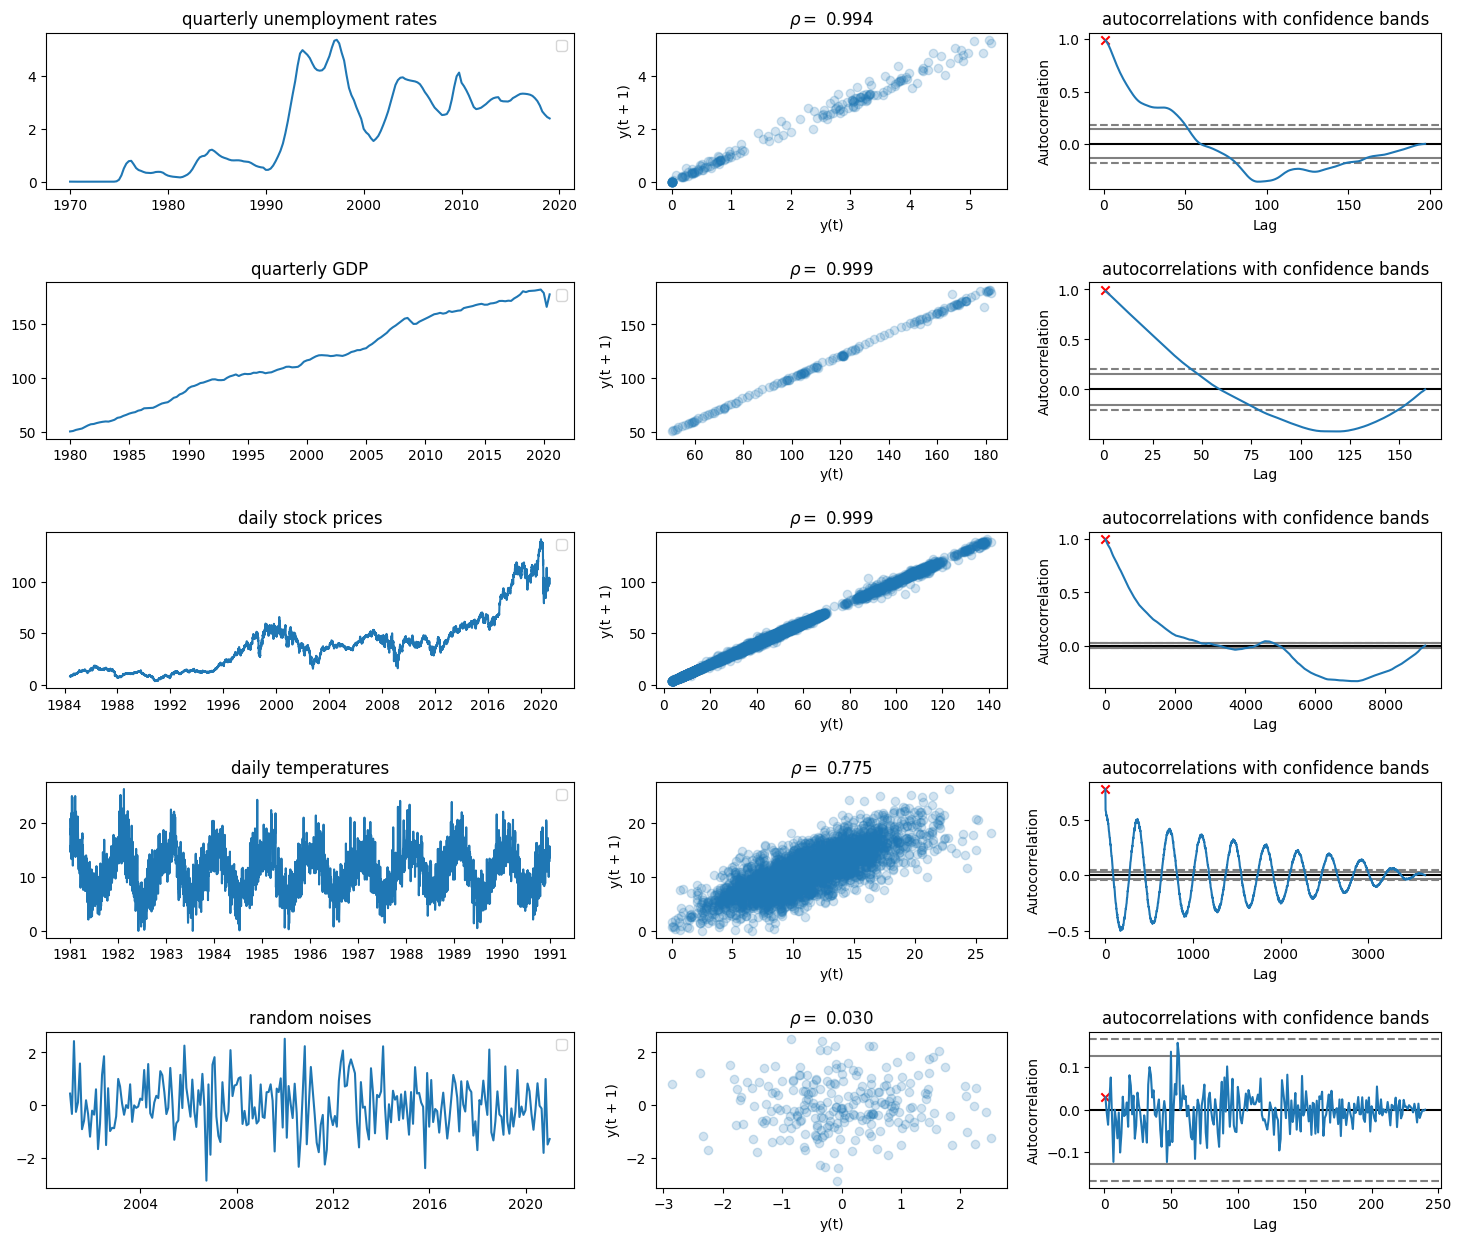

In [349]:
fig, axes = plt.subplots(
    nrows=5,
    ncols=3,
    figsize=(18, 15),
    gridspec_kw={"hspace": 0.6, "wspace": 0.2, "width_ratios": [1.5, 1, 1]},
)

# 1st column of plots on the left: plot the data
axes[0, 0].plot(unemp)
axes[1, 0].plot(0.001 * gdp)
axes[2, 0].plot(prices)
axes[3, 0].plot(temp)
axes[4, 0].plot(noise)

#  define the titles
titles = [
    "quarterly unemployment rates",
    "quarterly GDP",
    "daily stock prices",
    "daily temperatures",
    "random noises",
]

#  add labels and titles
for (ax, t) in zip(axes[:, 0].flatten(), titles):
    ax.legend("")
    ax.set_xlabel("")
    ax.set_title(str(t))

# middle column: scatter plots of the values with their first lags
lag_plot(unemp, lag=1, ax=axes[0, 1], alpha=0.2)
lag_plot(0.001 * gdp, lag=1, ax=axes[1, 1], alpha=0.2)
lag_plot(prices, lag=1, ax=axes[2, 1], alpha=0.2)
lag_plot(temp, lag=1, ax=axes[3, 1], alpha=0.2)
lag_plot(noise, lag=1, ax=axes[4, 1], alpha=0.2)

# squeeze dataframes to series and set the titles for lag_plots in the middle column
axes[0, 1].set_title(r"$\rho = $ {:.3f}".format(unemp.squeeze().autocorr(1)))
axes[1, 1].set_title(r"$\rho = $ {:.3f}".format(gdp.squeeze().autocorr(1)))
axes[2, 1].set_title(r"$\rho = $ {:.3f}".format(prices.squeeze().autocorr(1)))
axes[3, 1].set_title(r"$\rho = $ {:.3f}".format(temp.squeeze().autocorr(1)))
axes[4, 1].set_title(r"$\rho = $ {:.3f}".format(noise.squeeze().autocorr(1)))

# 1st column of plots on the right: plot autocorrelations
autocorrelation_plot(unemp, ax=axes[0, 2])
autocorrelation_plot(gdp, ax=axes[1, 2])
autocorrelation_plot(prices, ax=axes[2, 2])
autocorrelation_plot(temp, ax=axes[3, 2])
autocorrelation_plot(noise, ax=axes[4, 2])

# add titles
for ax in axes[:, 2].flatten():
    ax.grid()
    ax.set_title("autocorrelations with confidence bands")

# add the red cross on the 1st lag
axes[0, 2].scatter(1, unemp.squeeze().autocorr(1), marker="x", c="red")
axes[1, 2].scatter(1, gdp.squeeze().autocorr(1), marker="x", c="red")
axes[2, 2].scatter(1, prices.squeeze().autocorr(1), marker="x", c="red")
axes[3, 2].scatter(1, temp.squeeze().autocorr(1), marker="x", c="red")
axes[4, 2].scatter(1, noise.squeeze().autocorr(1), marker="x", c="red")

plt.show()

In [352]:
test

[      lb_stat     lb_pvalue
 1  195.919467  1.623082e-44,
       lb_stat     lb_pvalue
 1  160.297847  9.740307e-37,
        lb_stat  lb_pvalue
 1  9122.678411        0.0,
       lb_stat  lb_pvalue
 1  2189.94089        0.0,
     lb_stat  lb_pvalue
 1  0.213622   0.643943]

In [355]:
sm.stats.acorr_ljungbox(unemp, lags=[1], return_df=False)

lb_stat     lb_pvalue
1  195.919467  1.623082e-44

In [ ]:
test.rename(index={0:"unemp",1: "gdp",2: "prices",3: "temp",4: "noise"}, inplace=True)
    
test.rename({'lb_stat': "LB test statistic",
             'p-value': "p-value"})
test.round(2)

In [382]:
test = pd.DataFrame()
test = pd.concat([test, sm.stats.acorr_ljungbox(unemp, lags=[1], return_df=False)], axis=0)
test = pd.concat([test, sm.stats.acorr_ljungbox(gdp, lags=[1], return_df=False)], axis=0)
test = pd.concat([test, sm.stats.acorr_ljungbox(prices, lags=[1], return_df=False)], axis=0)
test = pd.concat([test, sm.stats.acorr_ljungbox(temp, lags=[1], return_df=False)], axis=0)
test = pd.concat([test, sm.stats.acorr_ljungbox(noise, lags=[1], return_df=False)], axis=0)

test.reset_index(inplace=True)
test.drop('index',axis=1, inplace=True)

test.rename(index={0:"unemp",1: "gdp",2: "prices",3: "temp",4: "noise"}, 
            columns={'lb_stat': "LB test statistic",
             'p-value': "p-value"},
            inplace=True)
test.round(2)



LB test statistic  lb_pvalue
unemp              195.92       0.00
gdp                160.30       0.00
prices            9122.68       0.00
temp              2189.94       0.00
noise                0.21       0.64

# 12. Detecting and removing non-stationary

__Statistical test of non-stationarity__

One popular test for this purpose is the Augmented Dickey-Fuller (ADF) test. The null hypothesis is that the data has a unit root (i.e. the data is non-stationary), and if we fail to reject the null hypothesis, this test may provide evidence that the series is non-stationary.

In [383]:
# load the data
data = pd.read_csv("c2_financial_data.csv", index_col="Date")
data.index = pd.to_datetime(data.index, format="%d.%m.%y")

prices = data["Close"]

One popular test for this purpose is the Augmented Dickey-Fuller (ADF) test. The null hypothesis is that the data has a unit root (i.e. the data is non-stationary), and if we fail to reject the null hypothesis, this test may provide evidence that the series is non-stationary.

In [384]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(prices)
print("p-value is %.2f" % adf_test[1])

p-value is 0.84


The time series analysis of statsmodels module in Python offers another function called kpss for checking the stationarity of a time series. However, the null hypothesis for the KPSS test, in contrast to the ADF test, is that the data is stationary around a deterministic trend, i.e. trend-stationary. Let’s perform this test on the price data.

In [386]:
from statsmodels.tsa.stattools import kpss

kpss_test = kpss(prices, regression="ct", nlags="auto")
print("p-value is %.2f" % kpss_test[1])

p-value is 0.01


/tmp/ipykernel_29841/1531437484.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test = kpss(prices, regression="ct", nlags="auto")


There are four possible outcomes after applying the two tests and below are the conclusions one can draw from the results:

- __Case__ 1: Both tests conclude that the series is not stationary. Then the series is not stationary
- __Case__ 2: Both tests conclude that the series is stationary. Then the series is stationary
- __Case__ 3: KPSS indicates stationarity and ADF indicates non-stationarity. Then the series is trend stationary and should be detrended to become stationary.
- __Case__ 4: KPSS indicates non-stationarity and ADF indicates stationarity. Then the series is difference stationary and should be differenced to become stationary.

__Removing non-stationarity__

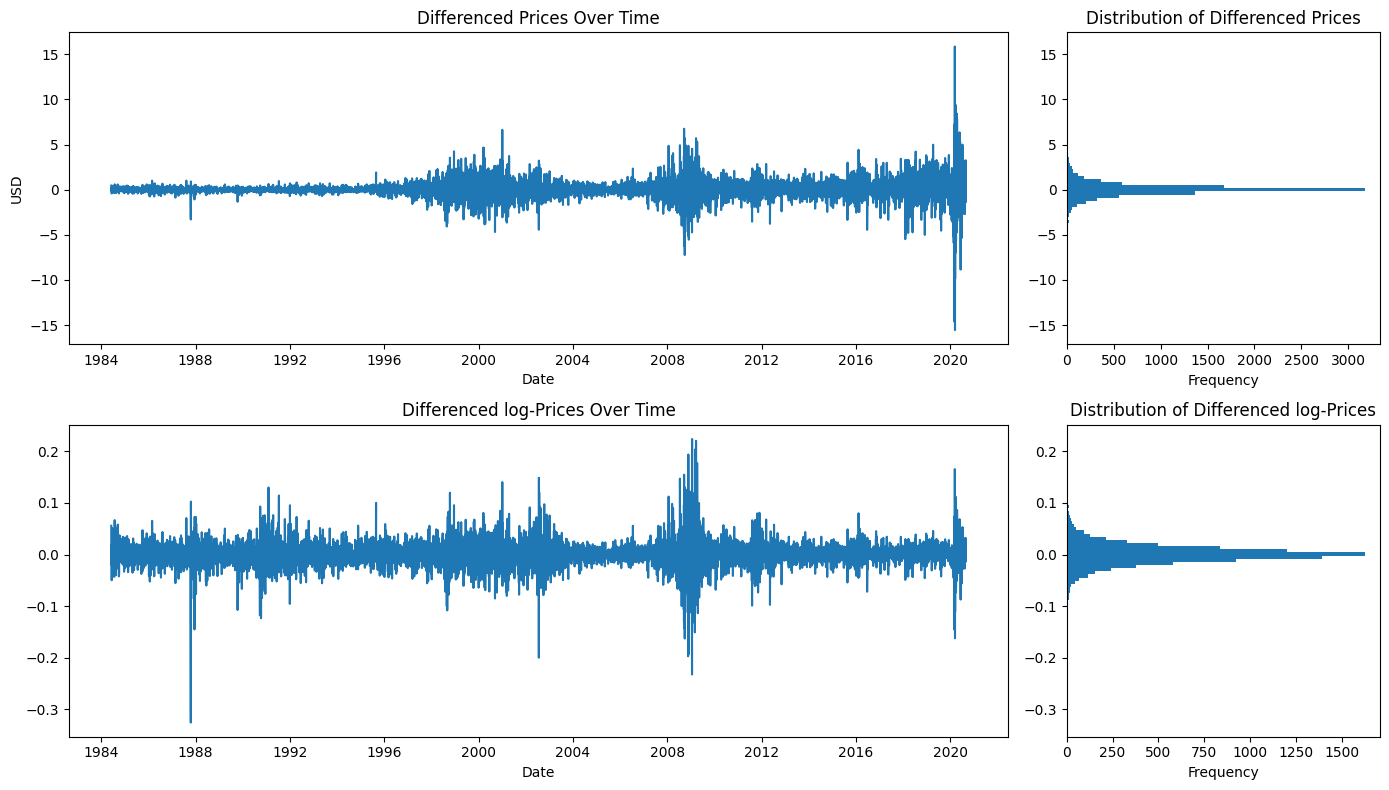

In [387]:
fig, ax = plt.subplots(2, 2, figsize=(14, 8), gridspec_kw={"width_ratios": [3, 1]})

# create the first plot for the prices over time
ax[0, 0].set_title("Differenced Prices Over Time")
ax[0, 0].set_xlabel("Date")
ax[0, 0].set_ylabel("USD")
ax[0, 0].plot(prices.diff(1).dropna())

# create the histogram of prices in the second plot
ax[0, 1].set_title("Distribution of Differenced Prices")
ax[0, 1].set_xlabel("Frequency")
ax[0, 1].hist(prices.diff(1).dropna(), bins=90, orientation="horizontal")

# create the first plot for the prices over time
ax[1, 0].set_title("Differenced log-Prices Over Time")
ax[1, 0].set_xlabel("Date")
ax[1, 0].set_ylabel("")
ax[1, 0].plot(np.log(prices).diff(1).dropna())

# create the histogram of prices in the second plot
ax[1, 1].set_title("Distribution of Differenced log-Prices")
ax[1, 1].set_xlabel("Frequency")
ax[1, 1].hist(np.log(prices).diff(1).dropna(), bins=90, orientation="horizontal")

fig.tight_layout()
plt.show()

In [389]:
adf_test = adfuller(np.log(prices).diff(1).dropna(), regression="n")
print("ADF p-value is %.2f" % adf_test[1])

kpss_test = kpss(np.log(prices).diff(1).dropna(), regression="ct", nlags="auto")
print("KPSS p-value is %.2f" % kpss_test[1])

ADF p-value is 0.00
KPSS p-value is 0.10


/tmp/ipykernel_29841/180369784.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(np.log(prices).diff(1).dropna(), regression="ct", nlags="auto")


__Non-stationarity and seasonality__

In [391]:
# U.S. Natural Gas Total Consumption in billion cubic feet
data = pd.read_csv("c2_gas_US.csv", index_col="Date")
data.index = pd.to_datetime(data.index, format="%b.%y")

data.head()

U.S. Natural Gas Total Consumption (Bcf)
Date                                                
2001-01-01                                  2676.998
2001-02-01                                  2309.464
2001-03-01                                  2246.633
2001-04-01                                  1807.170
2001-05-01                                  1522.382

In [392]:
adf_test = adfuller(data, regression="ct")
print("ADF p-value is %.2f" % adf_test[1])

kpss_test = kpss(data, regression="ct", nlags="auto")
print("KPSS p-value is %.2f" % kpss_test[1])

ADF p-value is 0.48
KPSS p-value is 0.10


/tmp/ipykernel_29841/858076147.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(data, regression="ct", nlags="auto")


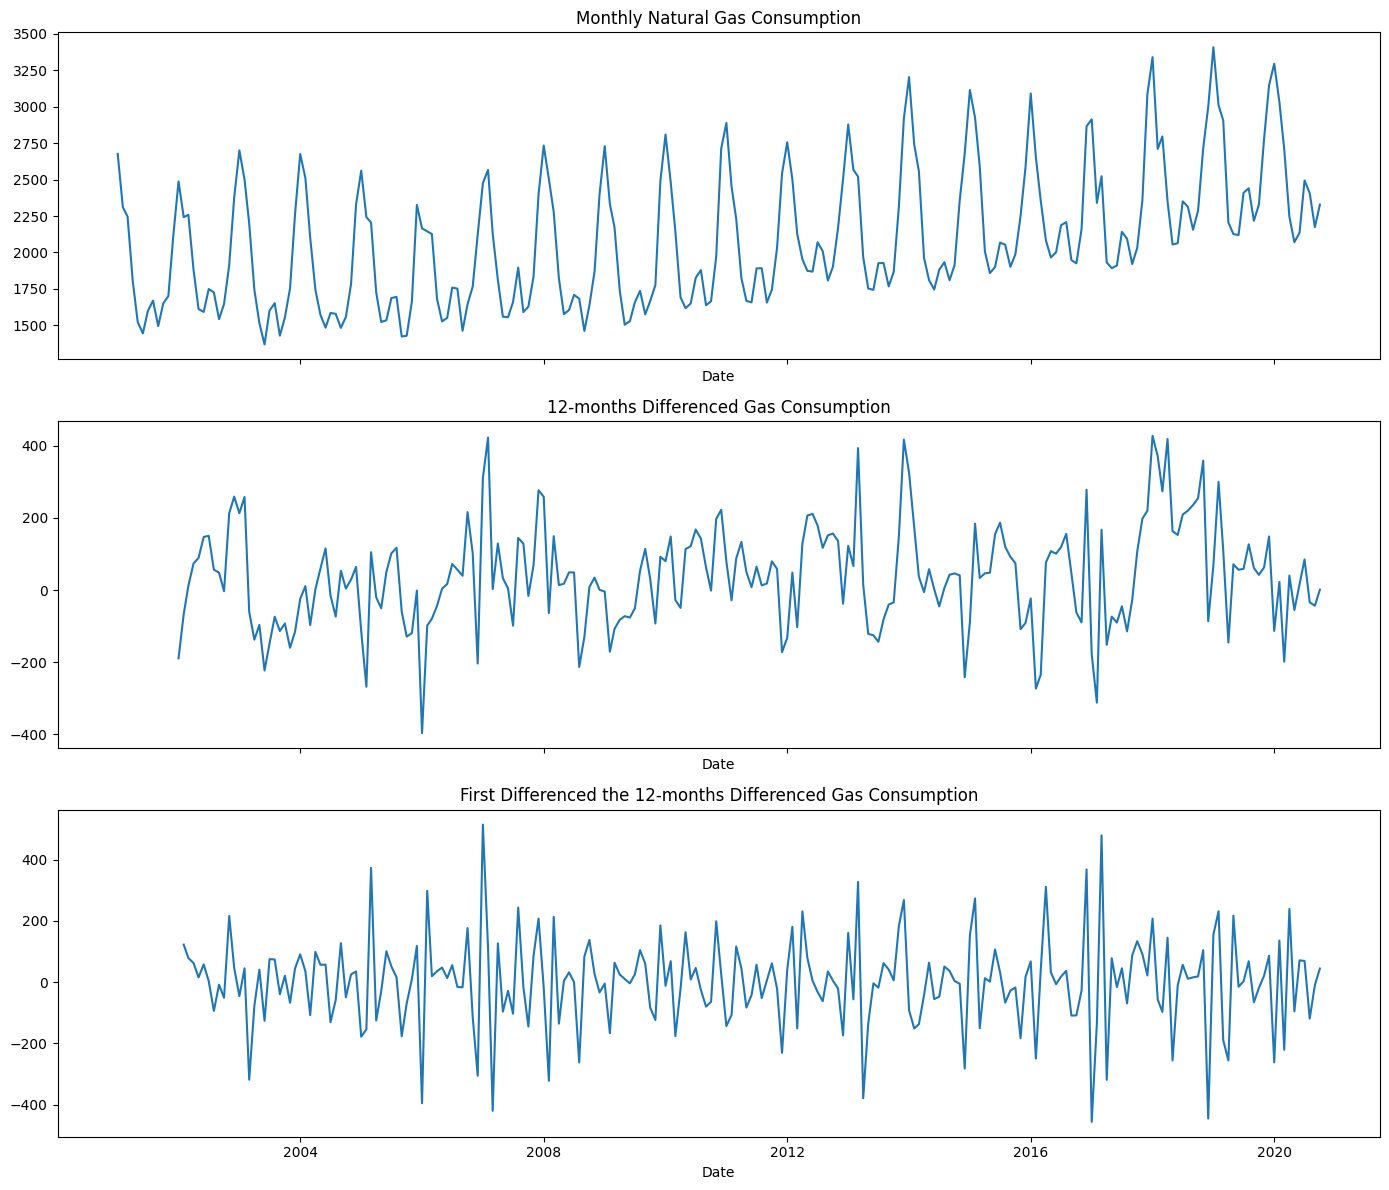

In [393]:
fig, ax = plt.subplots(3, 1, figsize=(14, 12), sharex=True)

# create the plot for original data
ax[0].set_title("Monthly Natural Gas Consumption")
ax[0].set_xlabel("Date")
ax[0].set_ylabel("")
ax[0].plot(data)

# create the seasonally differenced plot
ax[1].set_title("12-months Differenced Gas Consumption")
ax[1].set_xlabel("Date")
ax[1].set_ylabel("")
ax[1].plot(data.diff(12))

# create the first differenced plot
ax[2].set_title("First Differenced the 12-months Differenced Gas Consumption")
ax[2].set_xlabel("Date")
ax[2].set_ylabel("")
ax[2].plot(data.diff(12).diff(1))

fig.tight_layout()
plt.show()

In [395]:
adf_test = adfuller(data.diff(12).diff(1).dropna(), regression="c")
print("ADF p-value is %.2f" % adf_test[1])

kpss_test = kpss(data.diff(12).diff(1).dropna(), regression="ct", nlags="auto")
print("KPSS p-value is %.2f" % kpss_test[1])

ADF p-value is 0.00
KPSS p-value is 0.10


/tmp/ipykernel_29841/3215953896.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(data.diff(12).diff(1).dropna(), regression="ct", nlags="auto")


# 13. Exercise: air passengers data

Airline Passengers Data
---

In this exercise, you will use Airline Passengers dataset, which provides the monthly number of airline passengers from 1949 to 1960 for an airline company. 

1. Load the data from the file `c2_AirPassengers.csv` into a dataframe:
- Use the Month column as the index when you load the data.
- Check the shape of the data. 
- Are all years and months from 1949 to 1960 present in the data?

In [1]:
# Import libraries
import pandas as pd
import numpy as np

# Load the data and create a datetime index
data = pd.read_csv("c2_AirPassengers.csv", index_col="Month", parse_dates=True)

# Rename columns for convenience
data.columns = ["Passengers"]
data.index.names = ["Date"]

# Print the shape of the dataframe
print(data.shape)

# Print a few samples
data.head()

(144, 1)


Passengers
Date                  
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121

__Answers__:
Yes, there are 144 rows i.e. 12 years multiplied by 12 months of data.

2. Do the following steps:
- Create new columns Month and Year using the index of the dataframe.
- Group the Passengers column by the Year and provide summary statistics of the number of passengers.
- Discuss the patterns.

In [397]:
# Create new columns Month and Year
data["Year"] = data.index.year
data["Month"] = data.index.month

# Group by the 'Year' and generate descriptive statistics
data.groupby("Year")["Passengers"].describe().astype(int)

count  mean  std  min  25%  50%  75%  max
Year                                           
1949     12   126   13  104  118  125  135  148
1950     12   139   19  114  125  137  151  170
1951     12   170   18  145  159  169  179  199
1952     12   197   22  171  180  192  211  242
1953     12   225   28  180  199  232  238  272
1954     12   238   34  188  221  231  260  302
1955     12   284   42  233  260  272  312  364
1956     12   328   47  271  300  315  359  413
1957     12   368   57  301  330  351  408  467
1958     12   381   64  310  339  360  411  505
1959     12   428   69  342  387  406  465  559
1960     12   476   77  390  418  461  514  622

__Answers__:
Looking at the result from the table, we observe:  
* an increasing *trend*, as the *mean* number of passengers increases with time. For example, the mean number of passengers in 1949 is approximately 126. Six years later, in 1955, the average number of passengers has doubled (284) and, in 1960, is has almost quadrupled (476).
* that the annual variation in the data increases with time. In 1949, the number of passengers ranges from 104 to 148 (i.e., a total variation of 44 passengers, and average variation (std) of 13 passengers), while in 1960, the average variation is 77 passengers, i.e. about 6 times higher.

3. Finding trends and cycles in the data using visualisations:

- Do you observe a trend in the data over time?
- Is there a seasonal component present in the data? if yes, describe it and explain if it has changed over time.

In [399]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

/home/miguel/.pyenv/versions/3.9/envs/epfl_extension_school/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/miguel/.pyenv/versions/3.9/envs/epfl_extension_school/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/miguel/.pyenv/versions/3.9/envs/epfl_extension_school/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/miguel/.pyenv/versions/3.9/envs/epfl_extension_school/lib/python3.9/site-packages/seaborn/_

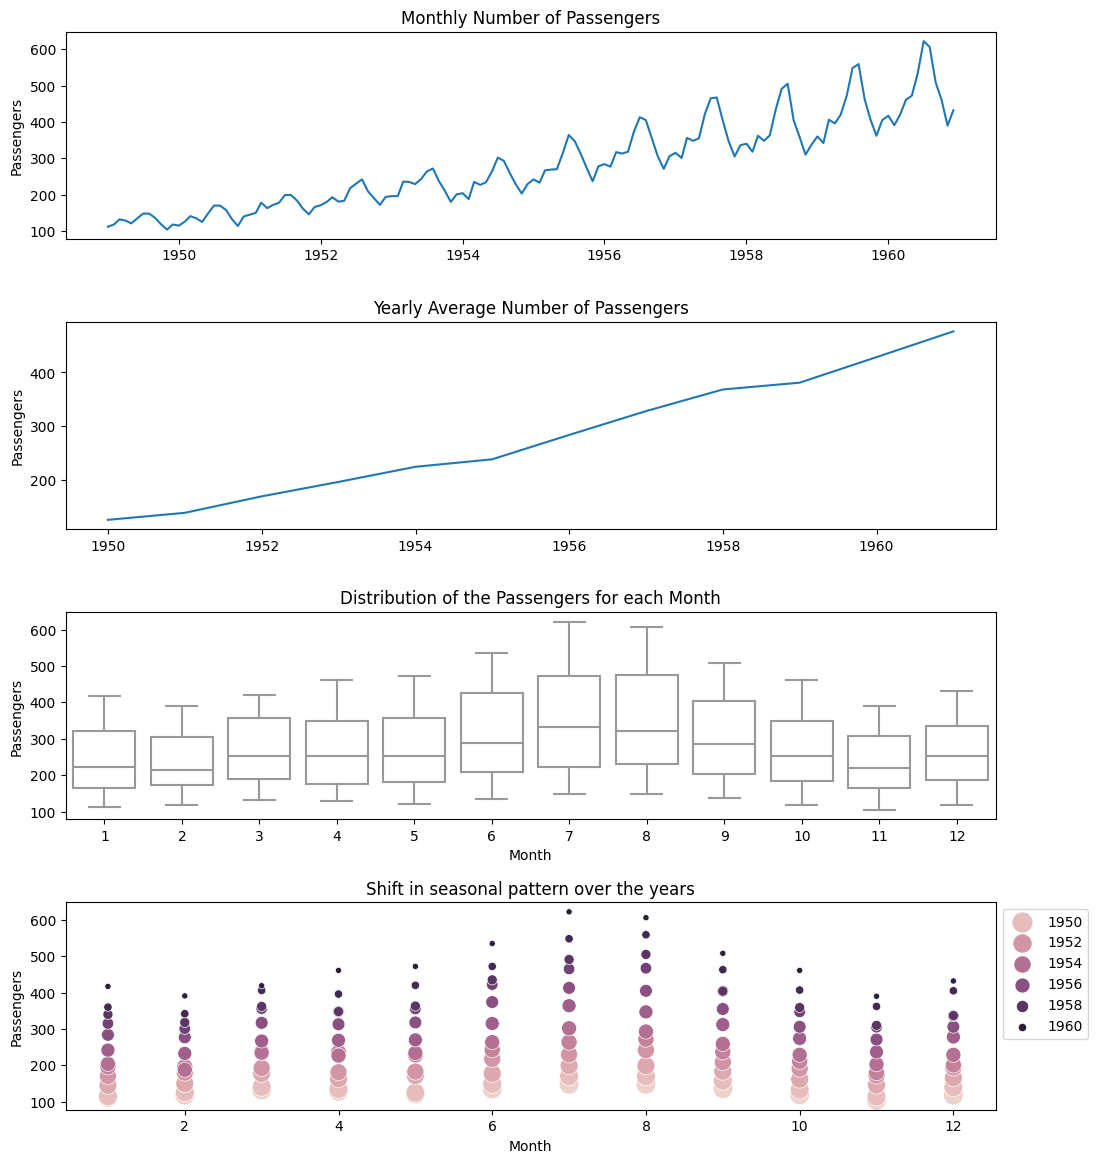

In [400]:
# plotting trend and seasonality
fig, axes = plt.subplots(4, 1, figsize=(12, 14), gridspec_kw={"hspace": 0.4})
axes[0].plot(data["Passengers"])
axes[0].set_title("Monthly Number of Passengers")
axes[0].set_ylabel("Passengers")

axes[1].plot(data["Passengers"].resample("A").mean())
axes[1].set_title("Yearly Average Number of Passengers")
axes[1].set_ylabel("Passengers")

sns.boxplot(data=data, x="Month", y="Passengers", color="white", ax=axes[2])
axes[2].set_title("Distribution of the Passengers for each Month")

sns.scatterplot(
    data=data, x="Month", y="Passengers", hue="Year", size="Year", sizes=(200, 20)
)
axes[3].set_title("Shift in seasonal pattern over the years")
axes[3].legend(bbox_to_anchor=(1, 1))

plt.show()

__Answers__:
- Yes, there is a steady and upward trend in the data over time (1st and 2nd plots).
- Yes, there exists a strong seasonal pattern, as summer months are more popular than the winter months (3rd and 4th plots). Also, there is an upward shift in the seasonal component as more passengers are traveling in the more recent years (4th plot).

4. Find out autocorrelations in the data. 

In [401]:
from pandas.plotting import lag_plot

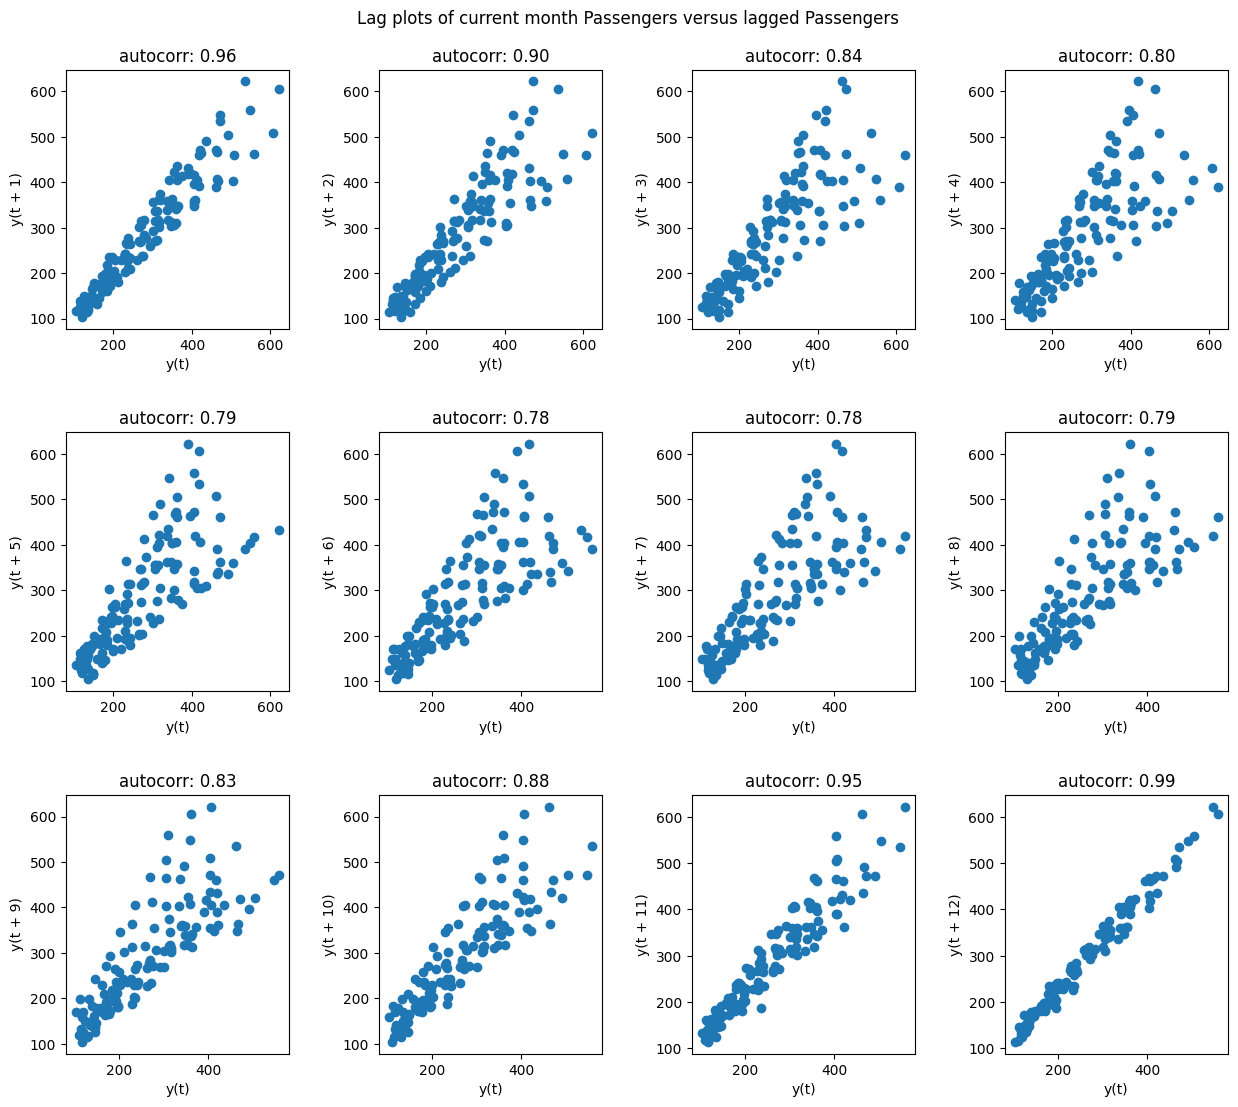

In [402]:
fig, axes = plt.subplots(
    nrows=3, ncols=4, figsize=(15, 12), gridspec_kw={"hspace": 0.4, "wspace": 0.4}
)
fig.suptitle("Lag plots of current month Passengers versus lagged Passengers")

for (ax, lag) in zip(axes.flatten(), range(1, 13)):

    lag_plot(data["Passengers"], lag=lag, ax=ax)
    ax.set_title("autocorr: {:.2f}".format(data["Passengers"].autocorr(lag)))

fig.subplots_adjust(top=0.93)

plt.show()

In [403]:
import statsmodels.api as sm

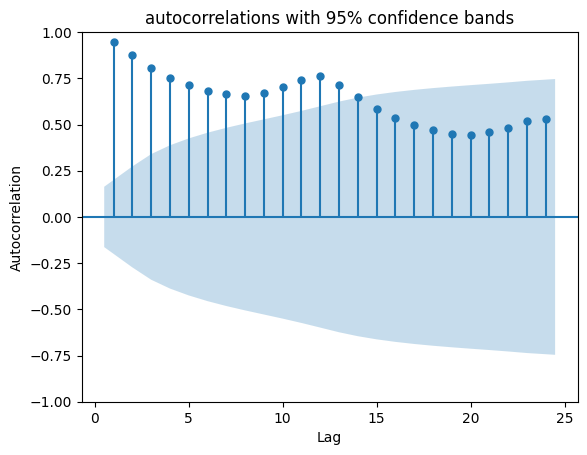

In [404]:
sm.graphics.tsa.plot_acf(data["Passengers"], lags=24, alpha=0.05, zero=False)

plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("autocorrelations with 95% confidence bands")

plt.show()

__Answers__:

- There are strong positive autocorrelations in the 1st and 12th lags. Thus the 1st and 12th lags of the number of passengers are strong predictors of the future number of passengers.
- Based on the 95% confident bands the first 13 lags are different from zero because they are out of the upper band.

5. Find out if data are stationary and try to remove non-stationarity if there is evidence supporting its presence.

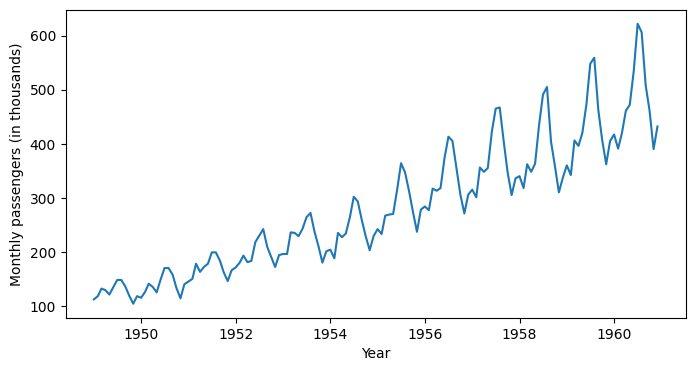

In [405]:
# Plot the number of passengers
plt.figure(figsize=(8, 4))

plt.plot(data["Passengers"])
plt.xlabel("Year")
plt.ylabel("Monthly passengers (in thousands)")

plt.show()

__Answers__:

* The plot shows that both mean and variance are increasing over time indicating non-stationarity.

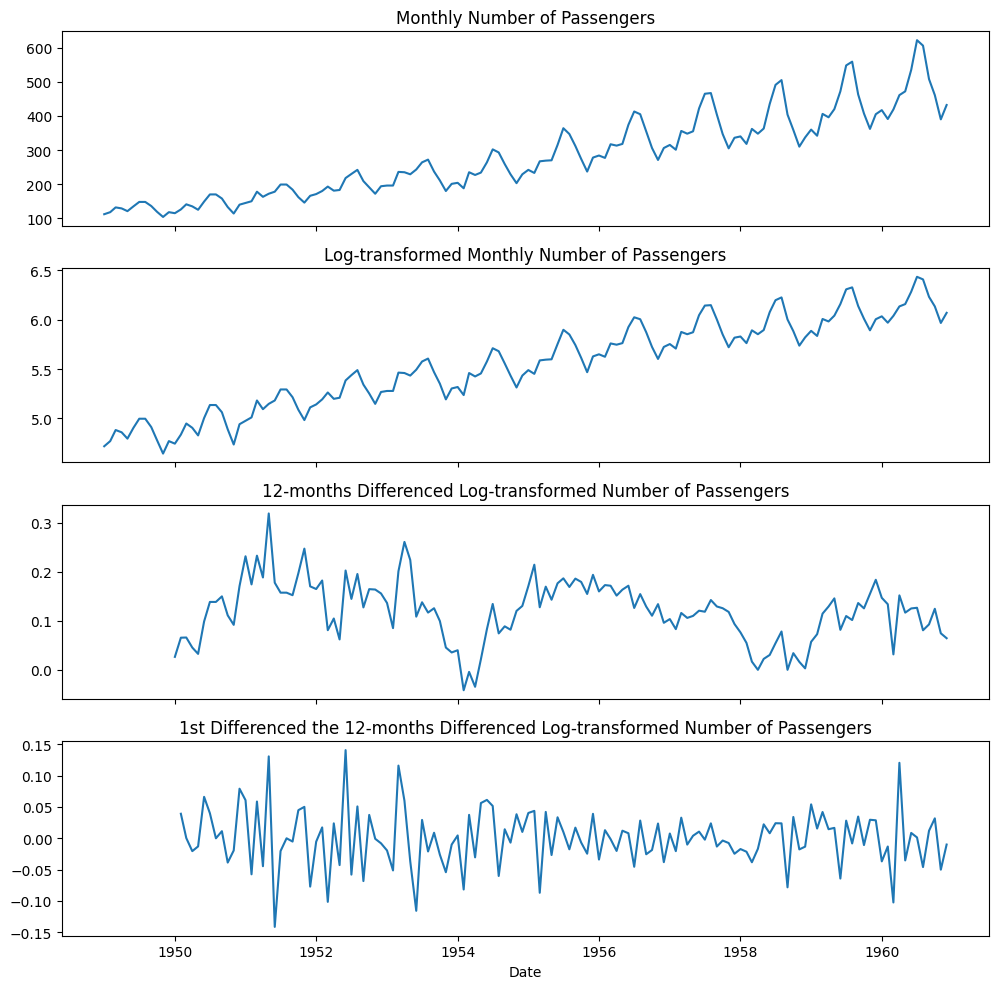

In [406]:
fig, ax = plt.subplots(4, 1, figsize=(10, 10), sharex=True)

# create the plot for original data
ax[0].set_title("Monthly Number of Passengers")
ax[0].plot(data["Passengers"])

# create the plot for original data
ax[1].set_title("Log-transformed Monthly Number of Passengers")
ax[1].plot(np.log(data["Passengers"]))

# create the seasonaly differenced plot
ax[2].set_title("12-months Differenced Log-transformed Number of Passengers")
ax[2].plot(np.log(data["Passengers"]).diff(12))

# create the first differenced plot
ax[3].set_title(
    "1st Differenced the 12-months Differenced Log-transformed Number of Passengers"
)
ax[3].set_xlabel("Date")
ax[3].plot(np.log(data["Passengers"]).diff(12).diff(1))

fig.tight_layout()
plt.show()

__Answers__:

* The plots show that taking the log makes the variations more stable over time (2nd panel). Also, 12-months differencing removes seasonality, and finally the 1st differencing makes the trend stable around zero (last panel).

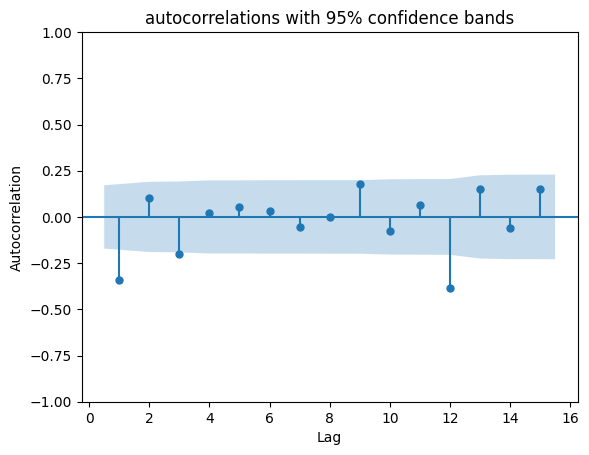

In [407]:
sm.graphics.tsa.plot_acf(
    np.log(data["Passengers"]).diff(12).diff(1).dropna(),
    lags=15,
    alpha=0.05,
    zero=False,
)

plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("autocorrelations with 95% confidence bands")

plt.show()

__Answers__:

* The plots show that most of the autocorrelations are not present in the transformed data. There is still some autocorrelations left in the the 1st and 12th lags. So, one can use these lags to model the (stationary) time series.